In [1]:
#Librerias necesarias
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import statsmodels.api as sm

---
# Inicio
## Cargamos el dataset

In [2]:
#Cargamos el dataset limpio del TP 1
data = pd.read_csv('dataset_caba.csv')
data.drop(['Unnamed: 0'],axis=1,inplace=True)
data.rename(columns={'place_name_normalized':'place', 'property_type':'ptype'}, inplace=True)
data.sample(3)

ptype     price  surface_total_in_m2  surface_covered_in_m2  \
1757  apartment  105000.0                 62.0                   58.0   
4646  apartment  255000.0                 97.0                   90.0   
5322  apartment  140000.0                 45.0                   42.0   

      price_usd_per_m2  floor  rooms          place disposicion  aEstrenar  \
1757       1693.548387    3.0    3.0  San Cristóbal      frente          0   
4646       2628.865979    0.0    4.0      Caballito      frente          0   
5322       3111.111111    0.0    2.0   Villa Crespo      frente          0   

      garage  balcon  piscina  sum  patio  lavadero  amenities  parrilla  
1757       0       1        0    0      0         1          1         0  
4646       1       1        0    0      0         1          0         1  
5322       1       1        0    0      0         1          0         0

---
# Modelo
Este modelo utiliza las columnas entregadas en el TP 1 más otras generadas para el TP 2: Garage, balcon, piscina, sum, patio, lavadero, amenities, parrilla.

In [3]:
y_columnas = ['price_usd_per_m2']
x_columnas = ['ptype','floor','rooms', 'place', 'disposicion', 'aEstrenar','garage','balcon','piscina','sum','patio','lavadero','amenities','parrilla']
data_modelo =  pd.concat([data[y_columnas],data[x_columnas]], axis = 1)
data_modelo

price_usd_per_m2      ptype  floor  rooms                place  \
0          1309.090909  apartment    3.0    2.0              Liniers   
1          1812.500000  apartment    2.0    4.0                Boedo   
2          1702.127660  apartment    1.0    5.0            Balvanera   
3          2200.000000  apartment    1.0    3.0            Caballito   
4          3236.363636  apartment   12.0    3.0             Belgrano   
...                ...        ...    ...    ...                  ...   
6397       1857.142857  apartment    2.0    2.0                 Boca   
6398       3461.538462  apartment    4.0    4.0            Caballito   
6399       2650.000000  apartment    1.0    3.0              Palermo   
6400       1826.923077  apartment    1.0    0.0  Villa General Mitre   
6401       2611.464968  apartment    1.0    0.0              Palermo   

       disposicion  aEstrenar  garage  balcon  piscina  sum  patio  lavadero  \
0          lateral          0       0       0        0    0      0         1   
1           frente          0       0       1        0    0      0         0   
2           frente          0       1       1        0    0      1         0   
3     contrafrente          0       0       1        0    0      0         1   
4           frente          0       1       1        0    0      1         1   
...            ...        ...     ...     ...      ...  ...    ...       ...   
6397        frente          0       0       0        0    0      1         1   
6398        frente          0       1       1        0    0      0         1   
6399        frente          0       0       1        1    1      1         1   
6400        frente          0       0       0        0    0      0         0   
6401        frente          0       0       1        0    0      1         1   

      amenities  parrilla  
0             0         0  
1             0         0  
2             1         0  
3             0         0  
4             0         0  
...         ...       ...  
6397          1         0  
6398          0         1  
6399          1         1  
6400          0         0  
6401          0         0  

[6402 rows x 15 columns]

In [4]:
data_modelo.describe()

price_usd_per_m2        floor        rooms    aEstrenar       garage  \
count       6402.000000  6402.000000  6402.000000  6402.000000  6402.000000   
mean        2380.909962     3.044830     2.448610     0.106061     0.404873   
std          621.800972     3.339138     1.395509     0.307939     0.490906   
min          208.713217     0.000000     0.000000     0.000000     0.000000   
25%         1970.588235     1.000000     1.000000     0.000000     0.000000   
50%         2346.802721     2.000000     2.000000     0.000000     0.000000   
75%         2796.610169     5.000000     3.000000     0.000000     1.000000   
max         3995.000000    24.000000    14.000000     1.000000     1.000000   

            balcon      piscina          sum        patio     lavadero  \
count  6402.000000  6402.000000  6402.000000  6402.000000  6402.000000   
mean      0.660106     0.226179     0.293658     0.367854     0.456420   
std       0.473710     0.418389     0.455473     0.482259     0.498136   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       1.000000     0.000000     0.000000     0.000000     0.000000   
75%       1.000000     0.000000     1.000000     1.000000     1.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

         amenities     parrilla  
count  6402.000000  6402.000000  
mean      0.391440     0.297095  
std       0.488111     0.457014  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       0.000000     0.000000  
75%       1.000000     1.000000  
max       1.000000     1.000000

### Análisis correlación

In [5]:
#Análisis de correlación entre variables
data_modelo.corr()

price_usd_per_m2     floor     rooms  aEstrenar    garage  \
price_usd_per_m2          1.000000  0.058369 -0.144575   0.104907  0.285288   
floor                     0.058369  1.000000  0.033199   0.016038 -0.013648   
rooms                    -0.144575  0.033199  1.000000  -0.183809 -0.030968   
aEstrenar                 0.104907  0.016038 -0.183809   1.000000  0.116874   
garage                    0.285288 -0.013648 -0.030968   0.116874  1.000000   
balcon                    0.076541  0.072054  0.056995   0.096160  0.171313   
piscina                   0.312766  0.008173 -0.168994   0.089032  0.339806   
sum                       0.186121  0.021748 -0.117335   0.122084  0.324783   
patio                    -0.094358 -0.102212  0.151473  -0.057620 -0.055086   
lavadero                  0.028815  0.071100  0.148587  -0.079346  0.092609   
amenities                 0.242141 -0.016232 -0.136284   0.088567  0.307336   
parrilla                  0.113369 -0.010674 -0.162959   0.143504  0.256206   

                    balcon   piscina       sum     patio  lavadero  amenities  \
price_usd_per_m2  0.076541  0.312766  0.186121 -0.094358  0.028815   0.242141   
floor             0.072054  0.008173  0.021748 -0.102212  0.071100  -0.016232   
rooms             0.056995 -0.168994 -0.117335  0.151473  0.148587  -0.136284   
aEstrenar         0.096160  0.089032  0.122084 -0.057620 -0.079346   0.088567   
garage            0.171313  0.339806  0.324783 -0.055086  0.092609   0.307336   
balcon            1.000000  0.107332  0.094853 -0.087225  0.131198   0.110654   
piscina           0.107332  1.000000  0.508099 -0.028379  0.122261   0.477500   
sum               0.094853  0.508099  1.000000 -0.033118  0.123204   0.423795   
patio            -0.087225 -0.028379 -0.033118  1.000000  0.090479  -0.060289   
lavadero          0.131198  0.122261  0.123204  0.090479  1.000000   0.111292   
amenities         0.110654  0.477500  0.423795 -0.060289  0.111292   1.000000   
parrilla          0.155494  0.386301  0.521205 -0.022440  0.105605   0.370812   

                  parrilla  
price_usd_per_m2  0.113369  
floor            -0.010674  
rooms            -0.162959  
aEstrenar         0.143504  
garage            0.256206  
balcon            0.155494  
piscina           0.386301  
sum               0.521205  
patio            -0.022440  
lavadero          0.105605  
amenities         0.370812  
parrilla          1.000000

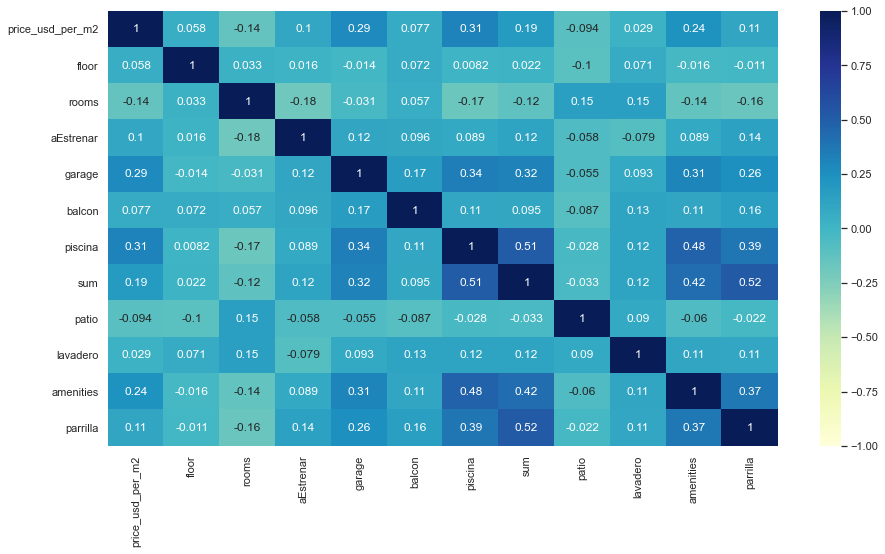

In [6]:
# visualizamos la matriz de correlación en Seaborn usando a heatmap
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(data_modelo.corr(), vmin=-1, vmax=1, center=0, cmap="YlGnBu",annot=True);

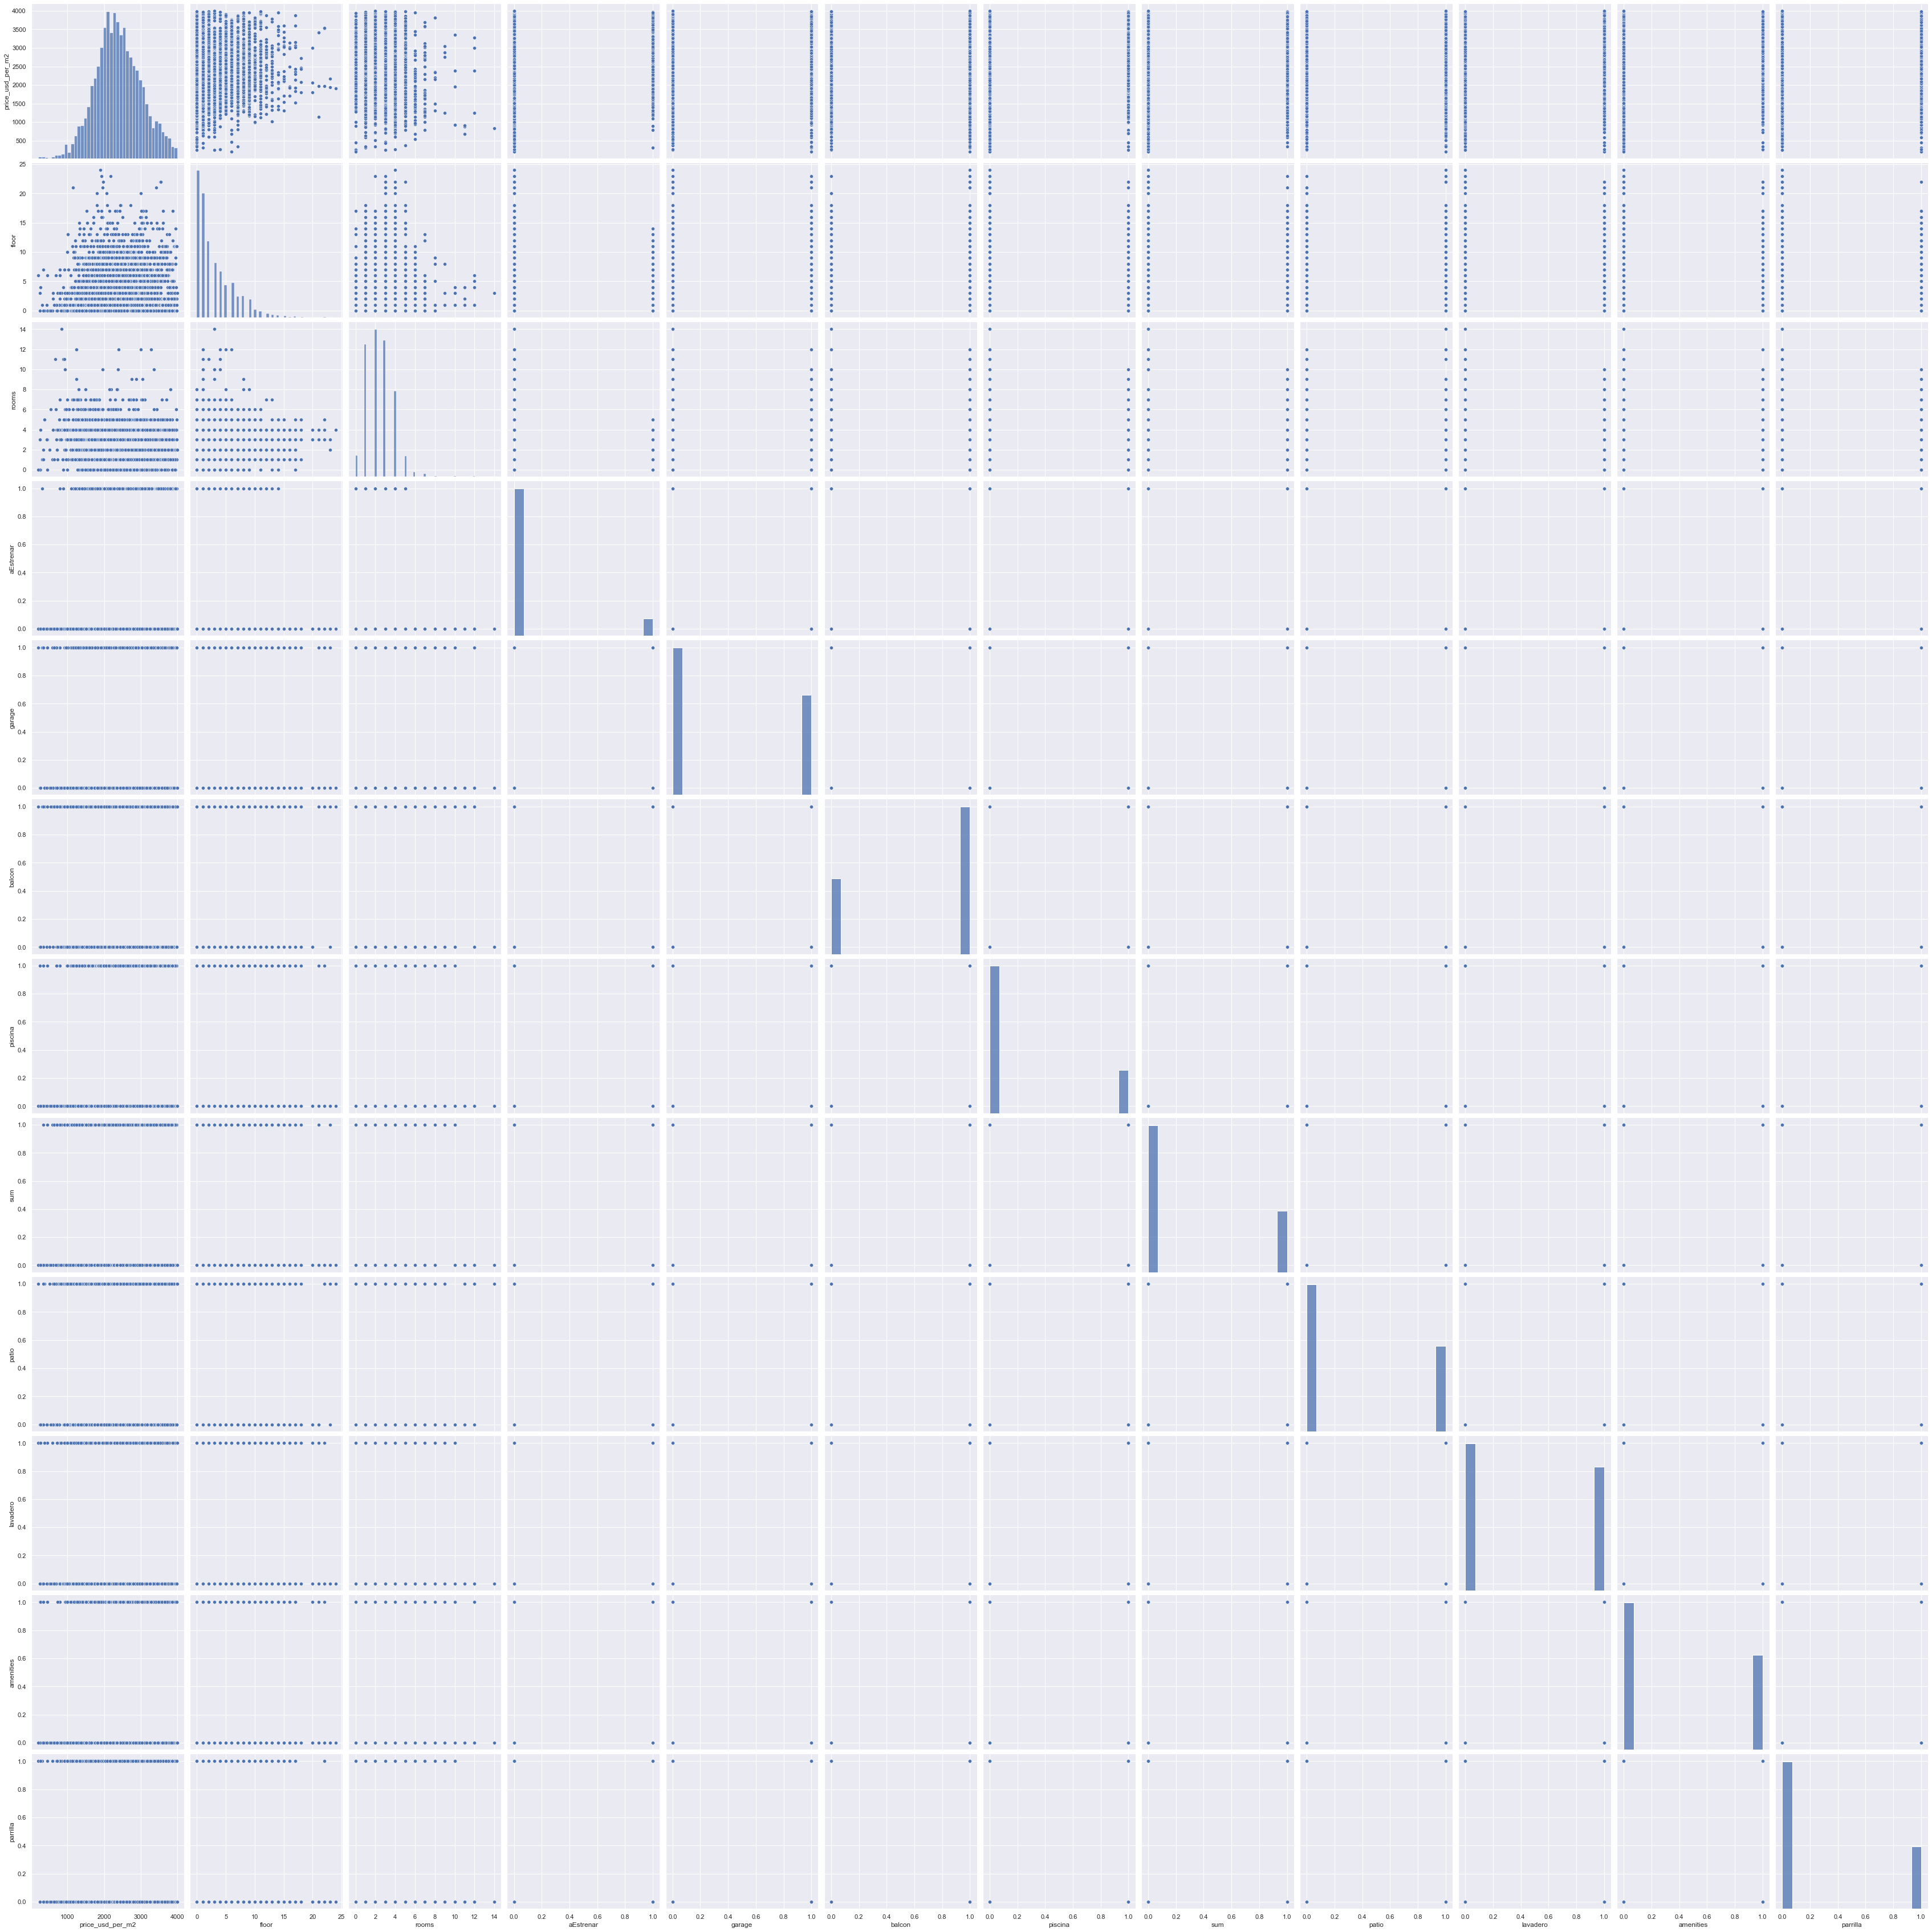

In [7]:
sns.pairplot(data=data_modelo, height=4)

In [8]:
name_model="Modelo 3 - Comparativa 3" #Cambiar este nombre para cambiar los resultados de los estadísticos de cada algoritmo

## Pre-Training
### Manejo variables categóricas
Modificar las variables que deban ser dumificadas

In [9]:
#Creo dummies
data_dummies=pd.get_dummies(data_modelo[['ptype','place','disposicion']], drop_first = True)
data_dummies

ptype_apartment  ptype_house  place_Almagro  place_Balvanera  \
0                   1            0              0                0   
1                   1            0              0                0   
2                   1            0              0                1   
3                   1            0              0                0   
4                   1            0              0                0   
...               ...          ...            ...              ...   
6397                1            0              0                0   
6398                1            0              0                0   
6399                1            0              0                0   
6400                1            0              0                0   
6401                1            0              0                0   

      place_Barracas  place_Belgrano  place_Boca  place_Boedo  \
0                  0               0           0            0   
1                  0               0           0            1   
2                  0               0           0            0   
3                  0               0           0            0   
4                  0               1           0            0   
...              ...             ...         ...          ...   
6397               0               0           1            0   
6398               0               0           0            0   
6399               0               0           0            0   
6400               0               0           0            0   
6401               0               0           0            0   

      place_Caballito  place_Chacarita  ...  place_Villa Ortuzar  \
0                   0                0  ...                    0   
1                   0                0  ...                    0   
2                   0                0  ...                    0   
3                   1                0  ...                    0   
4                   0                0  ...                    0   
...               ...              ...  ...                  ...   
6397                0                0  ...                    0   
6398                1                0  ...                    0   
6399                0                0  ...                    0   
6400                0                0  ...                    0   
6401                0                0  ...                    0   

      place_Villa Pueyrredón  place_Villa Real  place_Villa Riachuelo  \
0                          0                 0                      0   
1                          0                 0                      0   
2                          0                 0                      0   
3                          0                 0                      0   
4                          0                 0                      0   
...                      ...               ...                    ...   
6397                       0                 0                      0   
6398                       0                 0                      0   
6399                       0                 0                      0   
6400                       0                 0                      0   
6401                       0                 0                      0   

      place_Villa Santa Rita  place_Villa Soldati  place_Villa Urquiza  \
0                          0                    0                    0   
1                          0                    0                    0   
2                          0                    0                    0   
3                          0                    0                    0   
4                          0                    0                    0   
...                      ...                  ...                  ...   
6397                       0                    0                    0   
6398                       0                    0                    0   
6399                    

In [10]:
#Concateno las columnas que están por fuera del dummie
columnas=['price_usd_per_m2','floor','rooms','aEstrenar','garage','balcon','piscina','sum','patio','lavadero','amenities','parrilla']
data_modelo = pd.concat([data[columnas],data_dummies], axis = 1)
data_modelo = data_modelo.reset_index(drop=True)
data_modelo.head(3)

price_usd_per_m2  floor  rooms  aEstrenar  garage  balcon  piscina  sum  \
0       1309.090909    3.0    2.0          0       0       0        0    0   
1       1812.500000    2.0    4.0          0       0       1        0    0   
2       1702.127660    1.0    5.0          0       1       1        0    0   

   patio  lavadero  ...  place_Villa Ortuzar  place_Villa Pueyrredón  \
0      0         1  ...                    0                       0   
1      0         0  ...                    0                       0   
2      1         0  ...                    0                       0   

   place_Villa Real  place_Villa Riachuelo  place_Villa Santa Rita  \
0                 0                      0                       0   
1                 0                      0                       0   
2                 0                      0                       0   

   place_Villa Soldati  place_Villa Urquiza  place_Villa del Parque  \
0                    0                    0                       0   
1                    0                    0                       0   
2                    0                    0                       0   

   disposicion_frente  disposicion_lateral  
0                   0                    1  
1                   1                    0  
2                   1                    0  

[3 rows x 63 columns]

In [11]:
data_normalizar=data_modelo.drop(['price_usd_per_m2'],axis=1)
numericals = data_normalizar.columns

X = data_normalizar[numericals]

scaler = MinMaxScaler()
scaler.fit(X)

std_numerical_data = scaler.transform(X)
std_df = pd.DataFrame(std_numerical_data)
std_df.columns = [i for i in numericals]
std_df

floor     rooms  aEstrenar  garage  balcon  piscina  sum  patio  \
0     0.125000  0.142857        0.0     0.0     0.0      0.0  0.0    0.0   
1     0.083333  0.285714        0.0     0.0     1.0      0.0  0.0    0.0   
2     0.041667  0.357143        0.0     1.0     1.0      0.0  0.0    1.0   
3     0.041667  0.214286        0.0     0.0     1.0      0.0  0.0    0.0   
4     0.500000  0.214286        0.0     1.0     1.0      0.0  0.0    1.0   
...        ...       ...        ...     ...     ...      ...  ...    ...   
6397  0.083333  0.142857        0.0     0.0     0.0      0.0  0.0    1.0   
6398  0.166667  0.285714        0.0     1.0     1.0      0.0  0.0    0.0   
6399  0.041667  0.214286        0.0     0.0     1.0      1.0  1.0    1.0   
6400  0.041667  0.000000        0.0     0.0     0.0      0.0  0.0    0.0   
6401  0.041667  0.000000        0.0     0.0     1.0      0.0  0.0    1.0   

      lavadero  amenities  ...  place_Villa Ortuzar  place_Villa Pueyrredón  \
0          1.0        0.0  ...                  0.0                     0.0   
1          0.0        0.0  ...                  0.0                     0.0   
2          0.0        1.0  ...                  0.0                     0.0   
3          1.0        0.0  ...                  0.0                     0.0   
4          1.0        0.0  ...                  0.0                     0.0   
...        ...        ...  ...                  ...                     ...   
6397       1.0        1.0  ...                  0.0                     0.0   
6398       1.0        0.0  ...                  0.0                     0.0   
6399       1.0        1.0  ...                  0.0                     0.0   
6400       0.0        0.0  ...                  0.0                     0.0   
6401       1.0        0.0  ...                  0.0                     0.0   

      place_Villa Real  place_Villa Riachuelo  place_Villa Santa Rita  \
0                  0.0                    0.0                     0.0   
1                  0.0                    0.0                     0.0   
2                  0.0                    0.0                     0.0   
3                  0.0                    0.0                     0.0   
4                  0.0                    0.0                     0.0   
...                ...                    ...                     ...   
6397               0.0                    0.0                     0.0   
6398               0.0                    0.0                     0.0   
6399               0.0                    0.0                     0.0   
6400               0.0                    0.0                     0.0   
6401               0.0                    0.0                     0.0   

      place_Villa Soldati  place_Villa Urquiza  place_Villa del Parque  \
0                     0.0                  0.0                     0.0   
1                     0.0                  0.0                     0.0   
2                     0.0                  0.0                     0.0   
3                     0.0                  0.0                     0.0   
4                     0.0                  0.0                     0.0   
...                   ...                  ...                     ...   
6397                  0.0                  0.0                     0.0   
6398                  0.0                  0.0                     0.0   
6399                  0.0                  0.0                     0.0   
6400                  0.0                  0.0                     0.0   
6401                  0.0                  0.0                     0.0   

      disposicion_frente  disposicion_lateral  
0                    0.0                  1.0  
1                    1.0                  0.0  
2                    1.0                  0.0  
3                    0.0                  0.0  
4                    1.0                  0.0  
...                  ...                  ...  
6397                 1.0                  0.0

## Algoritmos

In [12]:
#Genero mi variable X
X=data_modelo.drop(['price_usd_per_m2'],axis=1)

#Genero la variable y
y = data_modelo[y_columnas].squeeze()

#Creamos las muestras
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10,shuffle=True)

### Linear Regression

In [13]:
#Entrenamos modelo LR
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
#Predecimos
lr_prediction = model_lr.predict(X_test)
lr_prediction_train = model_lr.predict(X_train)

intercept_lr = model_lr.intercept_
coeff_lr = model_lr.coef_
r2_test_lr = model_lr.score(X_test, y_test)
r2_train_lr = model_lr.score(X_train, y_train)
n = len(y_test)
p = np.count_nonzero(coeff_lr)
r2_adj_test_lr = 1-((1-r2_test_lr)*((len(y_test)-1)/(len(y_test)-p-1)))
r2_adj_train_lr = 1-((1-r2_train_lr)*((len(y_train)-1)/(len(y_train)-p-1)))
mse_test_lr = mean_squared_error(y_test, lr_prediction)
mse_train_lr = mean_squared_error(y_train, lr_prediction_train)
mae_test_lr = mean_absolute_error(y_test, lr_prediction)
mae_train_lr = mean_absolute_error(y_train, lr_prediction_train)
rmse_test_lr = np.sqrt(mse_test_lr)
rmse_train_lr = np.sqrt(mse_train_lr)

#Valores estadísticos MSE Test, MSE Train, MAE Test, MAE Train, RMSE Test, RMSE Train, R2 Test, R2 Train, R2 Adj Test, R2 Adj Train
stats_lr=[mse_test_lr, mse_train_lr,
            mae_test_lr, mae_train_lr, 
            rmse_test_lr,rmse_train_lr,
            r2_test_lr,r2_train_lr,
            r2_adj_test_lr,r2_adj_train_lr
         ]

stats_dataframe_lr=pd.DataFrame({name_model+' LR':stats_lr},index=['MSE Test', 'MSE Train', 'MAE Test', 'MAE Train', 'RMSE Test', 'RMSE Train', 'R2 Test','R2 Train', 'R2 Adj Test','R2 Adj Train'])
stats_dataframe_lr

Modelo 3 - Comparativa 3 LR
MSE Test                    209517.888966
MSE Train                   210907.567662
MAE Test                       347.222404
MAE Train                      349.916306
RMSE Test                      457.731241
RMSE Train                     459.246739
R2 Test                          0.430117
R2 Train                         0.465626
R2 Adj Test                      0.411100
R2 Adj Train                     0.458127

In [14]:
print("Intercept:", intercept_lr)
print("Coeficientes:")
print(print(pd.Series(coeff_lr, index=X.columns)))

Intercept: 1983.8356171640125
Coeficientes:
floor                      13.455637
rooms                     -48.449818
aEstrenar                 112.988330
garage                    188.070994
balcon                      8.202319
                             ...    
place_Villa Soldati      -862.071775
place_Villa Urquiza       447.293699
place_Villa del Parque     29.546506
disposicion_frente         21.258005
disposicion_lateral        98.074003
Length: 62, dtype: float64
None


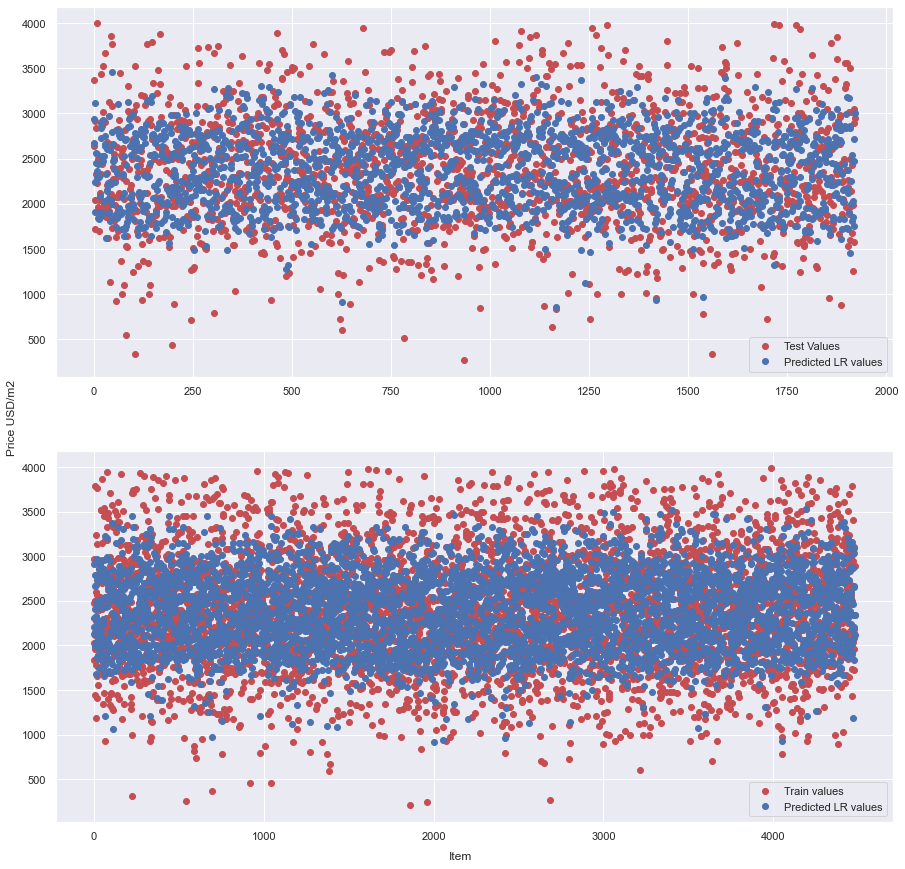

In [15]:
#Gráfico de los valores vs los predecidos
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

axes[0].plot([i for i in range(len(y_test))],y_test, 'ro', label="Test Values")
axes[0].plot([i for i in range(len(y_test))],lr_prediction, 'bo', label="Predicted LR values")
axes[0].legend()

axes[1].plot([i for i in range(len(y_train))],y_train, 'ro', label="Train values")
axes[1].plot([i for i in range(len(y_train))],lr_prediction_train, 'bo', label="Predicted LR values")
axes[1].legend()

fig.text(0.5, 0.09, 'Item', ha='center')
fig.text(0.08, 0.5, 'Price USD/m2', va='center', rotation='vertical')
plt.show()

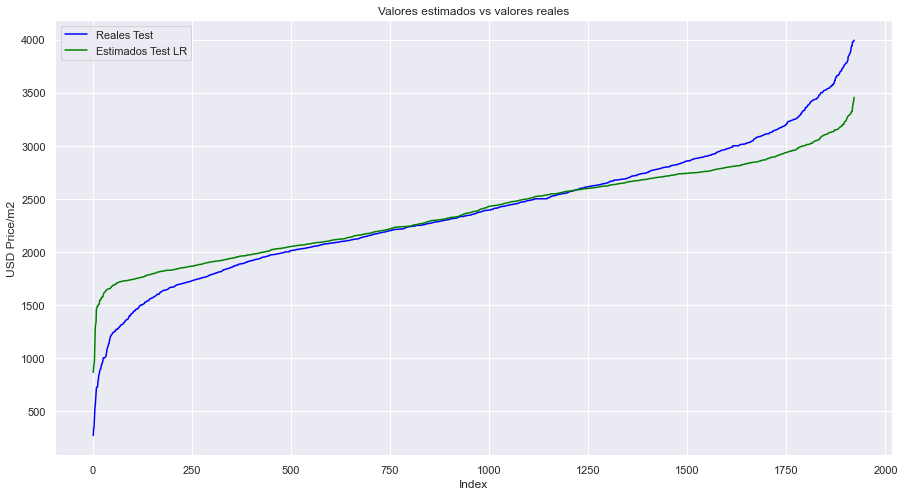

In [16]:
eje_X=range(1,len(y_test)+1)
plt.plot(eje_X, sorted(y_test), color='blue', label='Reales Test')
plt.plot(eje_X, sorted(lr_prediction), color='green', label='Estimados Test LR')
plt.legend()
plt.title('Valores estimados vs valores reales')
plt.xlabel('Index')
plt.ylabel('USD Price/m2')
plt.show()

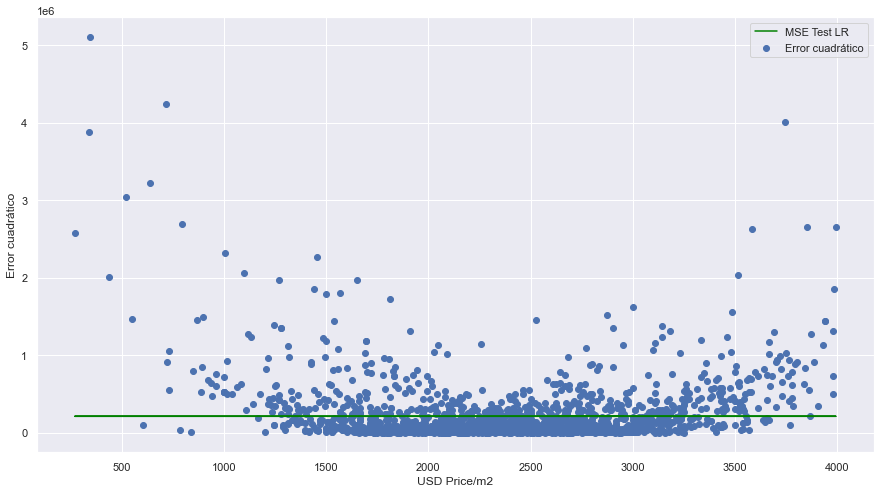

In [17]:
#Qué tan alejados están los valores del error cuadrático medio MSE TEST
err_cuad_test_lr=pow(y_test - lr_prediction,2)
plt.scatter(y_test,err_cuad_test_lr, label='Error cuadrático')
plt.plot(y_test,np.repeat(mse_test_lr,len(err_cuad_test_lr)), label='MSE Test LR', color='green')
plt.legend()
plt.xlabel('USD Price/m2')
plt.ylabel('Error cuadrático')
plt.show()

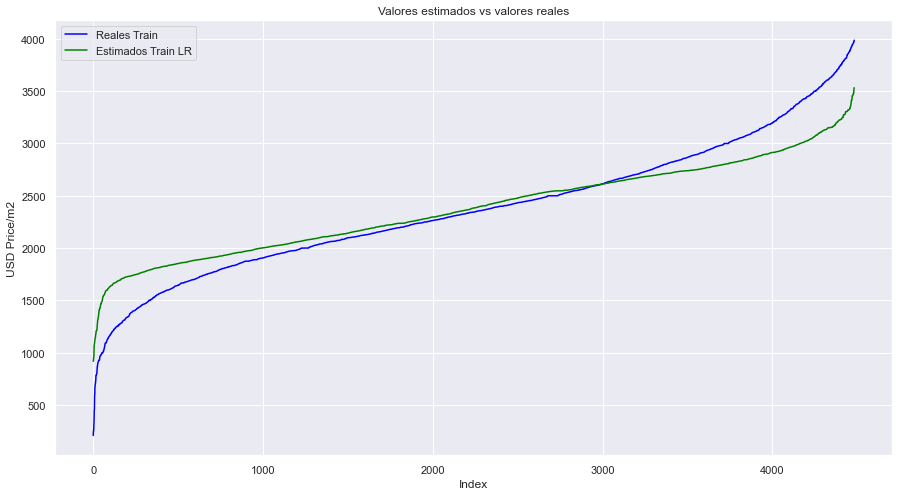

In [18]:
eje_X=range(1,len(y_train)+1)
plt.plot(eje_X, sorted(y_train), color='blue', label='Reales Train')
plt.plot(eje_X, sorted(lr_prediction_train), color='green', label='Estimados Train LR')
plt.legend()
plt.title('Valores estimados vs valores reales')
plt.xlabel('Index')
plt.ylabel('USD Price/m2')
plt.show()

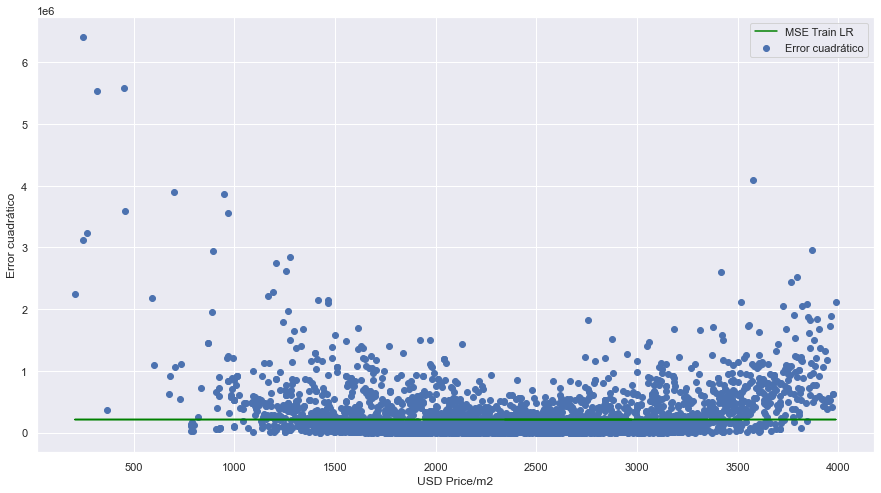

In [19]:
#Qué tan alejados están los valores del error cuadrático medio MSE TRAIN
err_cuad_train_lr=pow(y_train - lr_prediction_train,2)
plt.scatter(y_train,err_cuad_train_lr, label='Error cuadrático')
plt.plot(y_train,np.repeat(mse_train_lr,len(err_cuad_train_lr)), label='MSE Train LR', color='green')
plt.legend()
plt.xlabel('USD Price/m2')
plt.ylabel('Error cuadrático')
plt.show()

Text(0.5, 1.0, 'Residuos del modelo con train')

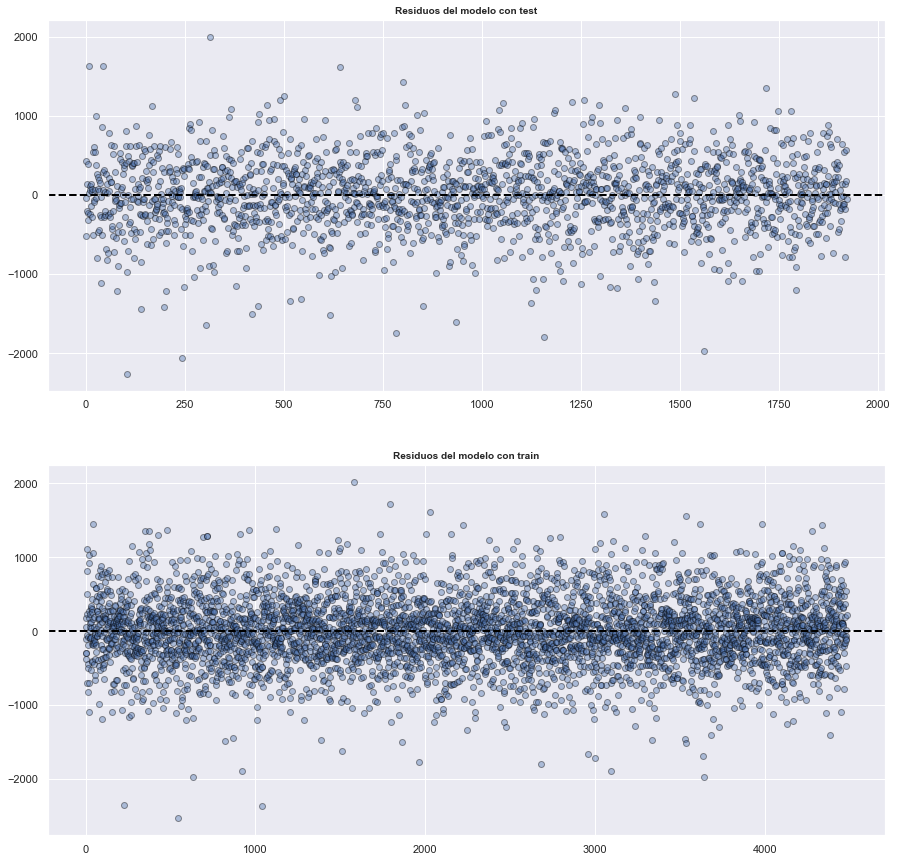

In [20]:
#Gráfico de los residuos/errores
model_residuals_test_lr = y_test - lr_prediction
model_residuals_train_lr = y_train-lr_prediction_train

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

axes[0].scatter(list(range(len(y_test))), model_residuals_test_lr,
                   edgecolors=(0, 0, 0), alpha = 0.4, c="b")
axes[0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0].set_title('Residuos del modelo con test', fontsize = 10, fontweight = "bold")
axes[1].scatter(list(range(len(y_train))), model_residuals_train_lr,
                   edgecolors=(0, 0, 0), alpha = 0.4, c="b")
axes[1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[1].set_title('Residuos del modelo con train', fontsize = 10, fontweight = "bold")

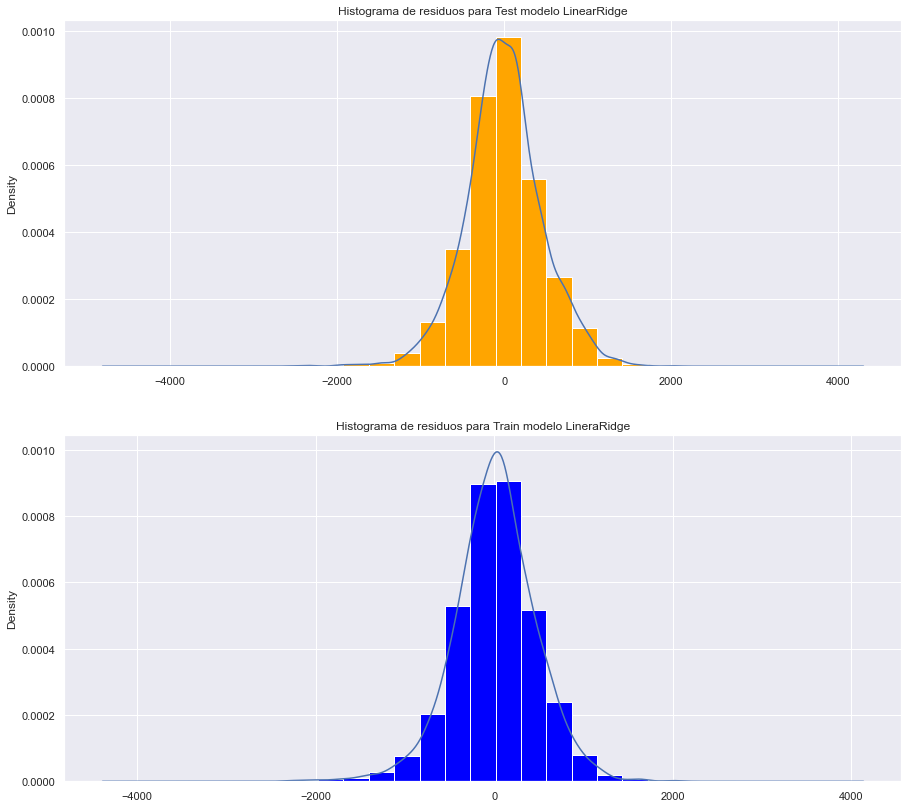

In [21]:
#Histograma de residuos
fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1, figsize=(15,14))

model_residuals_test_lr.plot(kind = "hist", ax=ax2, density = True, bins = 15, color="blue");
model_residuals_test_lr.plot(kind = "kde",ax=ax2);
model_residuals_train_lr.plot(kind = "hist", ax=ax1, density = True, bins = 15, color="orange");
model_residuals_train_lr.plot(kind = "kde",ax=ax1);
ax1.set_title("Histograma de residuos para Test modelo LinearRidge");
ax2.set_title("Histograma de residuos para Train modelo LineraRidge");

### OLS

In [22]:
#Entrenamos modelo OLS
X_train_sm = sm.add_constant(X_train)
model_ols = sm.OLS(y_train, X_train_sm).fit()
#Predecimos
X_test_sm = sm.add_constant(X_test)
sm_prediction = model_ols.predict(X_test_sm)
X_train_sm = sm.add_constant(X_train)
sm_prediction_train = model_ols.predict(X_train_sm)

r2_test_ols = r2_score(y_test,sm_prediction)
r2_train_ols = r2_score(y_train,sm_prediction_train)
r2_adj_test_ols = sm.OLS(y_test, X_test_sm).fit().rsquared_adj
r2_adj_train_ols = model_ols.rsquared_adj
mse_test_ols = mean_squared_error(y_test, sm_prediction)
mse_train_ols = mean_squared_error(y_train, sm_prediction_train)
mae_test_ols = mean_absolute_error(y_test, sm_prediction)
mae_train_ols = mean_absolute_error(y_train, sm_prediction_train)
rmse_test_ols = np.sqrt(mse_test_ols)
rmse_train_ols = np.sqrt(mse_train_ols)

#Valores estadísticos MSE Test, MSE Train, MAE Test, MAE Train, RMSE Test, RMSE Train, R2 Test, R2 Train, R2 Adj Test, R2 Adj Train
stats_ols=[mse_test_ols, mse_train_ols,
            mae_test_ols, mae_train_ols, 
            rmse_test_ols,rmse_train_ols,
            r2_test_ols,r2_train_ols,
            r2_adj_test_ols,r2_adj_train_ols
         ]

stats_dataframe_ols=pd.DataFrame({name_model+' OLS':stats_ols},index=['MSE Test', 'MSE Train', 'MAE Test', 'MAE Train', 'RMSE Test', 'RMSE Train', 'R2 Test','R2 Train', 'R2 Adj Test','R2 Adj Train'])

#Summary
print(model_ols.summary())
print("")
print(stats_dataframe_ols)

                            OLS Regression Results                            
Dep. Variable:       price_usd_per_m2   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     62.09
Date:                Sat, 06 Aug 2022   Prob (F-statistic):               0.00
Time:                        19:42:08   Log-Likelihood:                -33825.
No. Observations:                4481   AIC:                         6.778e+04
Df Residuals:                    4418   BIC:                         6.818e+04
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

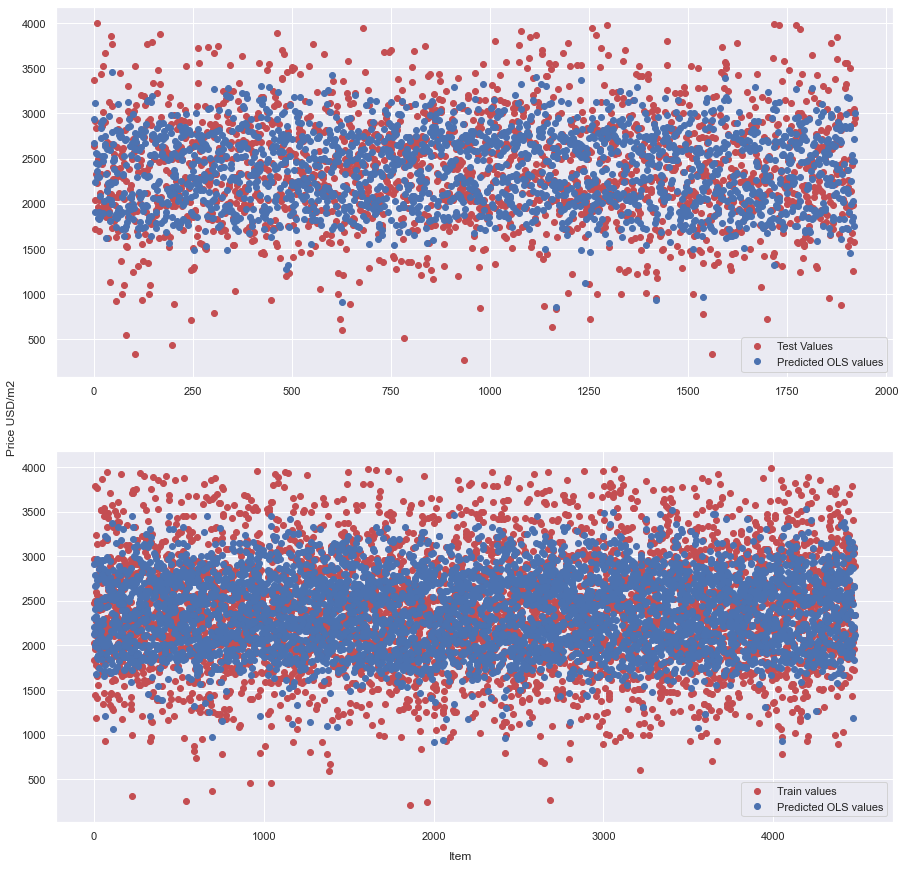

In [23]:
#Gráfico de los valores vs los predecidos
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

axes[0].plot([i for i in range(len(y_test))],y_test, 'ro', label="Test Values")
axes[0].plot([i for i in range(len(y_test))],sm_prediction, 'bo', label="Predicted OLS values")
axes[0].legend()

axes[1].plot([i for i in range(len(y_train))],y_train, 'ro', label="Train values")
axes[1].plot([i for i in range(len(y_train))],sm_prediction_train, 'bo', label="Predicted OLS values")
axes[1].legend()

fig.text(0.5, 0.09, 'Item', ha='center')
fig.text(0.08, 0.5, 'Price USD/m2', va='center', rotation='vertical')
plt.show()

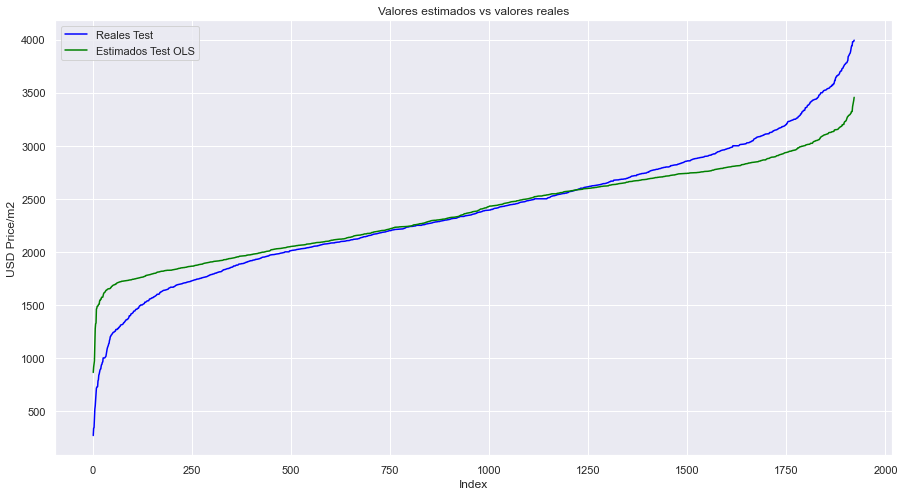

In [24]:
eje_X=range(1,len(y_test)+1)
plt.plot(eje_X, sorted(y_test), color='blue', label='Reales Test')
plt.plot(eje_X, sorted(sm_prediction), color='green', label='Estimados Test OLS')
plt.legend()
plt.title('Valores estimados vs valores reales')
plt.xlabel('Index')
plt.ylabel('USD Price/m2')
plt.show()

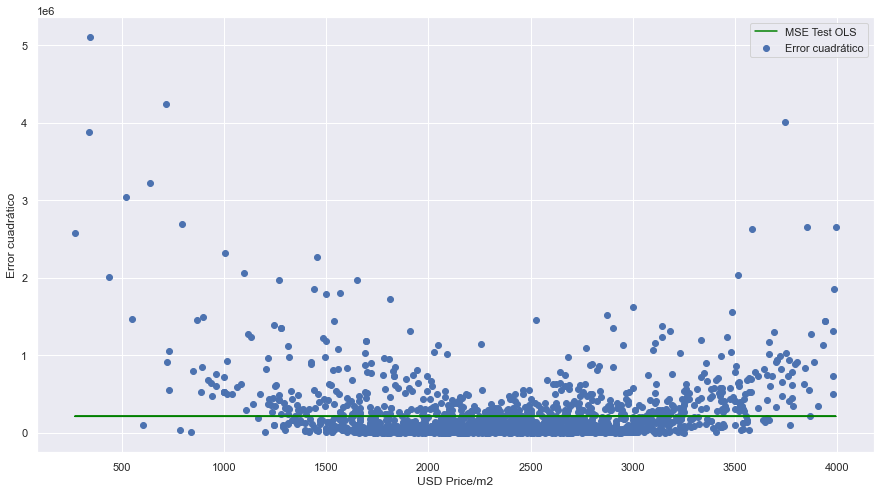

In [25]:
#Qué tan alejados están los valores del error cuadrático medio MSE TEST
err_cuad_test_ols=pow(y_test - sm_prediction,2)
plt.scatter(y_test,err_cuad_test_ols, label='Error cuadrático')
plt.plot(y_test,np.repeat(mse_test_ols,len(err_cuad_test_ols)), label='MSE Test OLS', color='green')
plt.legend()
plt.xlabel('USD Price/m2')
plt.ylabel('Error cuadrático')
plt.show()

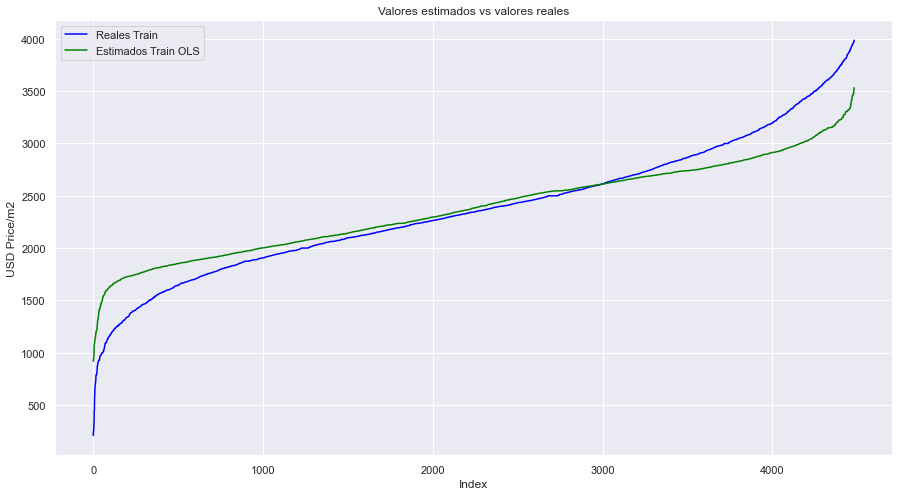

In [26]:
eje_X=range(1,len(y_train)+1)
plt.plot(eje_X, sorted(y_train), color='blue', label='Reales Train')
plt.plot(eje_X, sorted(sm_prediction_train), color='green', label='Estimados Train OLS')
plt.legend()
plt.title('Valores estimados vs valores reales')
plt.xlabel('Index')
plt.ylabel('USD Price/m2')
plt.show()

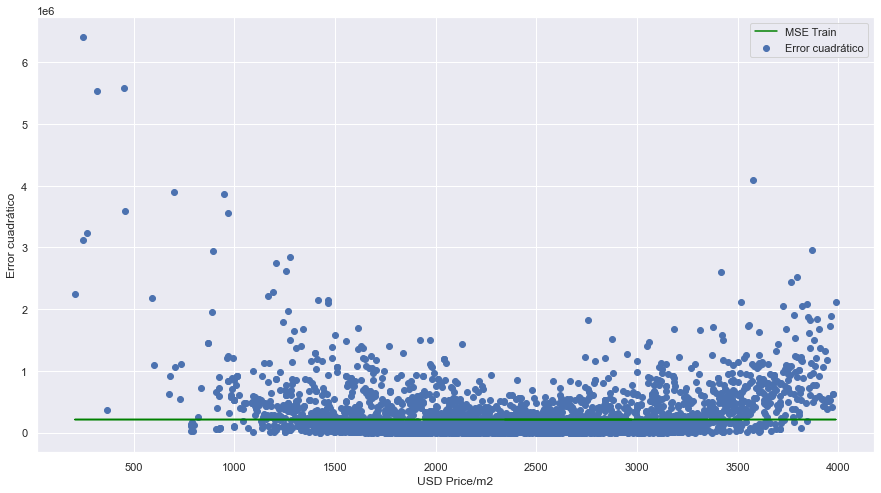

In [27]:
#Qué tan alejados están los valores del error cuadrático medio MSE TRAIN
err_cuad_train_ols=pow(y_train - sm_prediction_train,2)
plt.scatter(y_train,err_cuad_train_ols, label='Error cuadrático')
plt.plot(y_train,np.repeat(mse_train_ols,len(err_cuad_train_ols)), label='MSE Train', color='green')
plt.legend()
plt.xlabel('USD Price/m2')
plt.ylabel('Error cuadrático')
plt.show()

Text(0.5, 1.0, 'Residuos del modelo con train')

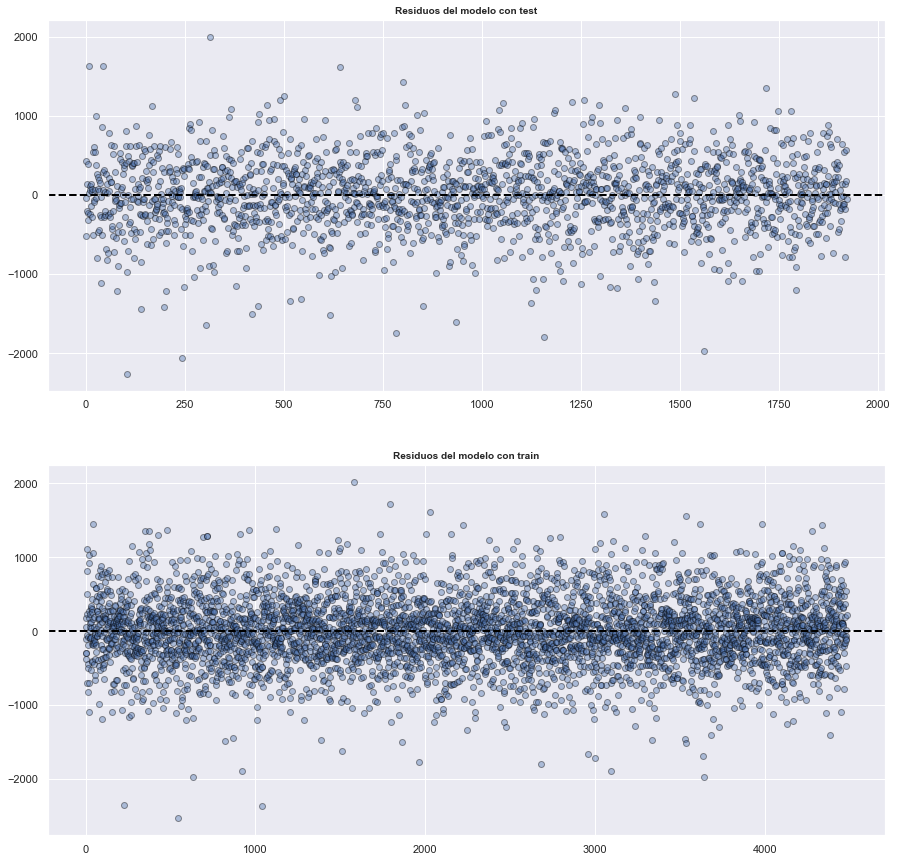

In [28]:
#Gráfico de los residuos/errores
model_residuals_test_ols = y_test - sm_prediction
model_residuals_train_ols = y_train - sm_prediction_train

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

axes[0].scatter(list(range(len(y_test))), model_residuals_test_ols,
                   edgecolors=(0, 0, 0), alpha = 0.4, c="b")
axes[0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0].set_title('Residuos del modelo con test', fontsize = 10, fontweight = "bold")
axes[1].scatter(list(range(len(y_train))), model_residuals_train_ols,
                   edgecolors=(0, 0, 0), alpha = 0.4, c="b")
axes[1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[1].set_title('Residuos del modelo con train', fontsize = 10, fontweight = "bold")

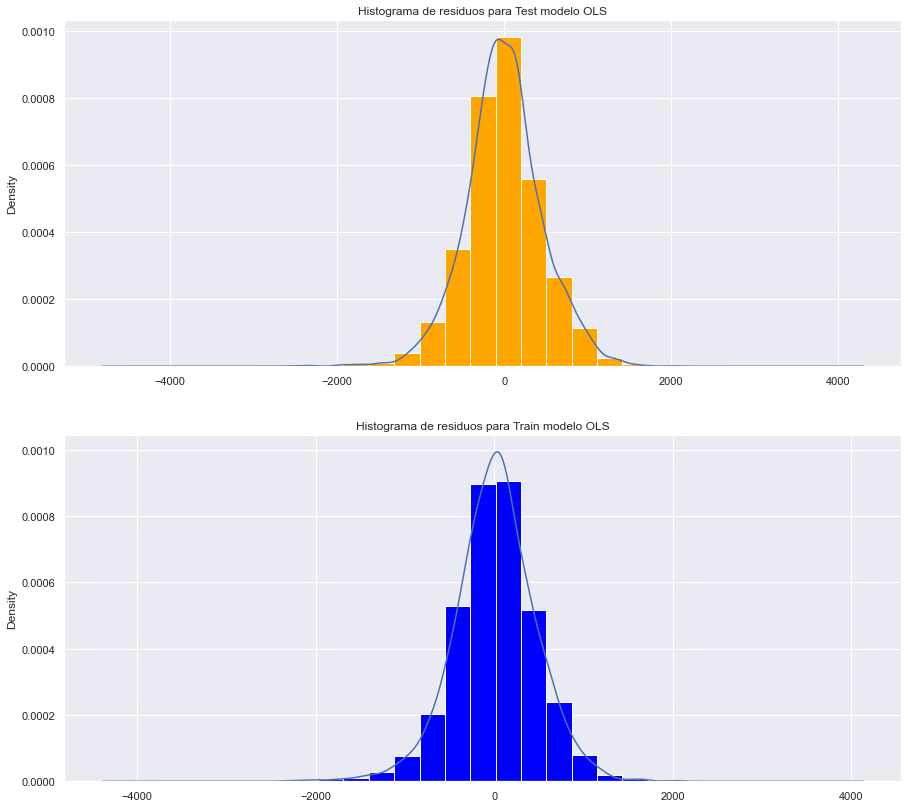

In [29]:
#Histograma de residuos
fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1, figsize=(15,14))

model_residuals_test_ols.plot(kind = "hist", ax=ax2, density = True, bins = 15, color="blue");
model_residuals_test_ols.plot(kind = "kde",ax=ax2);
model_residuals_train_ols.plot(kind = "hist", ax=ax1, density = True, bins = 15, color="orange");
model_residuals_train_ols.plot(kind = "kde",ax=ax1);
ax1.set_title("Histograma de residuos para Test modelo OLS");
ax2.set_title("Histograma de residuos para Train modelo OLS");

### LASSO

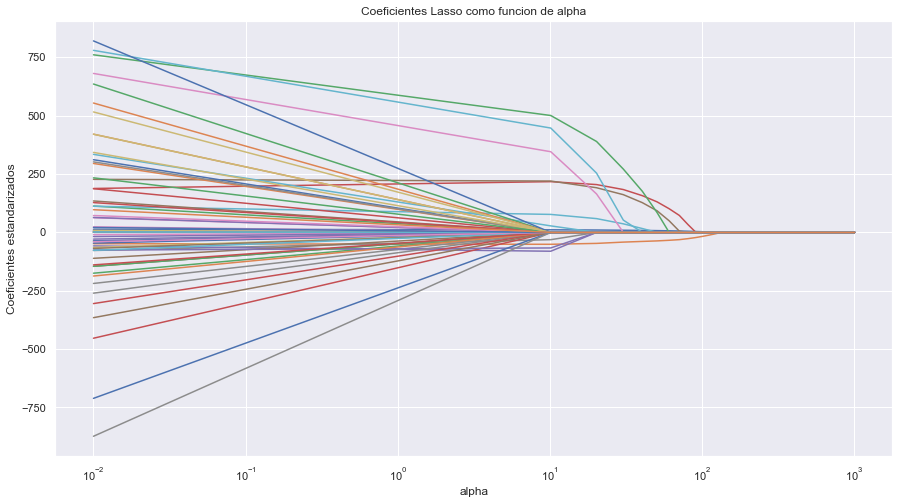

In [30]:
#Análisis previo de los alpha
alphas_lasso = np.linspace(0.01,1000,100)
lasso = linear_model.Lasso(max_iter = 10000, normalize = False)
coefs = []

for a in alphas_lasso:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()
ax.plot(alphas_lasso, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coeficientes estandarizados')
plt.title('Coeficientes Lasso como funcion de alpha');

In [31]:
#Creamos el modelo
lassocv = linear_model.LassoCV(alphas=None,normalize=False,cv=10,random_state=10, max_iter=10000)
#Lo entrenamos
model_lasso = lassocv.fit(X_train, y_train)
#Lo probamos
lasso_prediction = model_lasso.predict(X_test)
lasso_prediction_train = model_lasso.predict(X_train)

alpha_lasso = model_lasso.alpha_
coeff_lasso = model_lasso.coef_
intercept_lasso = model_lasso.intercept_
r2_test_lasso = model_lasso.score(X_test, y_test)
r2_train_lasso = model_lasso.score(X_train, y_train)
p = np.count_nonzero(coeff_lasso)
r2_adj_test_lasso = 1-((1-r2_test_lasso)*((len(y_test)-1)/(len(y_test)-p-1)))
r2_adj_train_lasso = 1-((1-r2_train_lasso)*((len(y_train)-1)/(len(y_train)-p-1)))
mse_test_lasso = mean_squared_error(y_test, lasso_prediction)
mse_train_lasso = mean_squared_error(y_train, lasso_prediction_train)
mae_test_lasso = mean_absolute_error(y_test, lasso_prediction)
mae_train_lasso = mean_absolute_error(y_train, lasso_prediction_train)
rmse_test_lasso = np.sqrt(mse_test_lasso)
rmse_train_lasso = np.sqrt(mse_train_lasso)

#Valores estadísticos MSE Test, MSE Train, MAE Test, MAE Train, RMSE Test, RMSE Train, R2 Test, R2 Train, R2 Adj Test, R2 Adj Train
stats_lasso = [mse_test_lasso, mse_train_lasso,
                mae_test_lasso, mae_train_lasso, 
                rmse_test_lasso,rmse_train_lasso,
                r2_test_lasso,r2_train_lasso,
                r2_adj_test_lasso,r2_adj_train_lasso
                ]

stats_dataframe_lasso =pd.DataFrame({name_model+' Lasso':stats_lasso},index=['MSE Test', 'MSE Train', 'MAE Test', 'MAE Train', 'RMSE Test', 'RMSE Train', 'R2 Test','R2 Train', 'R2 Adj Test','R2 Adj Train'])
stats_dataframe_lasso

Modelo 3 - Comparativa 3 Lasso
MSE Test                       209512.209619
MSE Train                      211244.286186
MAE Test                          347.377353
MAE Train                         350.376955
RMSE Test                         457.725037
RMSE Train                        459.613192
R2 Test                             0.430132
R2 Train                            0.464773
R2 Adj Test                         0.413955
R2 Adj Train                        0.458365

In [32]:
print("Alpha Lasso:",alpha_lasso)
print("Intercept Lasso:",intercept_lasso)
print("Coeficientes Ridge:")
print(pd.Series(coeff_lasso, index=X.columns))

Alpha Lasso: 0.17663381065771394
Intercept Lasso: 2011.372079466542
Coeficientes Ridge:
floor                      13.291897
rooms                     -48.524731
aEstrenar                 109.686316
garage                    189.689382
balcon                      7.494443
                             ...    
place_Villa Soldati      -626.461483
place_Villa Urquiza       411.272698
place_Villa del Parque     -0.000000
disposicion_frente         18.775462
disposicion_lateral        86.934486
Length: 62, dtype: float64


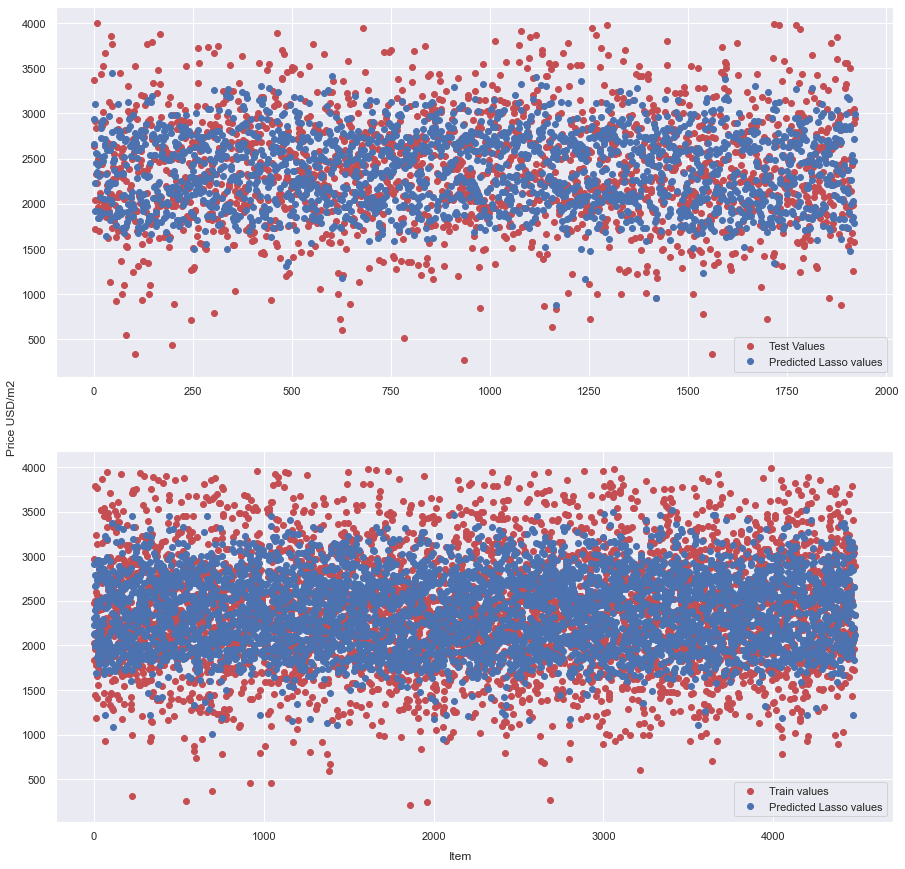

In [33]:
#Gráfico de los valores vs los predecidos
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

axes[0].plot([i for i in range(len(y_test))],y_test, 'ro', label="Test Values")
axes[0].plot([i for i in range(len(y_test))],lasso_prediction, 'bo', label="Predicted Lasso values")
axes[0].legend()

axes[1].plot([i for i in range(len(y_train))],y_train, 'ro', label="Train values")
axes[1].plot([i for i in range(len(y_train))],lasso_prediction_train, 'bo', label="Predicted Lasso values")
axes[1].legend()

fig.text(0.5, 0.09, 'Item', ha='center')
fig.text(0.08, 0.5, 'Price USD/m2', va='center', rotation='vertical')
plt.show()

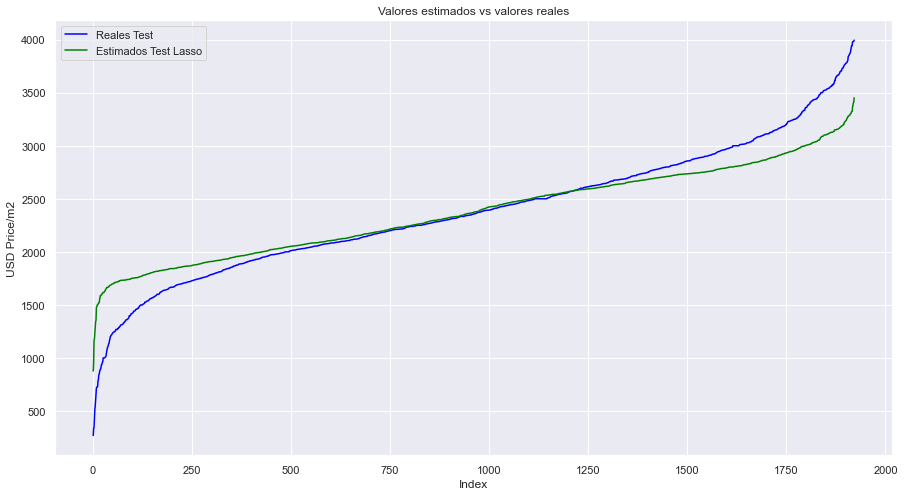

In [34]:
eje_X=range(1,len(y_test)+1)
plt.plot(eje_X, sorted(y_test), color='blue', label='Reales Test')
plt.plot(eje_X, sorted(lasso_prediction), color='green', label='Estimados Test Lasso')
plt.legend()
plt.title('Valores estimados vs valores reales')
plt.xlabel('Index')
plt.ylabel('USD Price/m2')
plt.show()

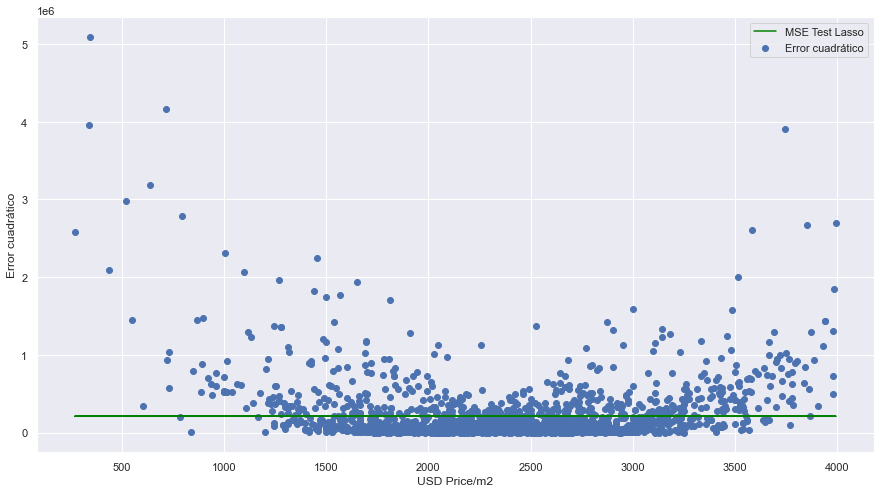

In [35]:
#Qué tan alejados están los valores del error cuadrático medio MSE TEST
err_cuad_test_lasso=pow(y_test - lasso_prediction,2)
plt.scatter(y_test,err_cuad_test_lasso, label='Error cuadrático')
plt.plot(y_test,np.repeat(mse_test_lasso,len(err_cuad_test_lasso)), label='MSE Test Lasso', color='green')
plt.legend()
plt.xlabel('USD Price/m2')
plt.ylabel('Error cuadrático')
plt.show()

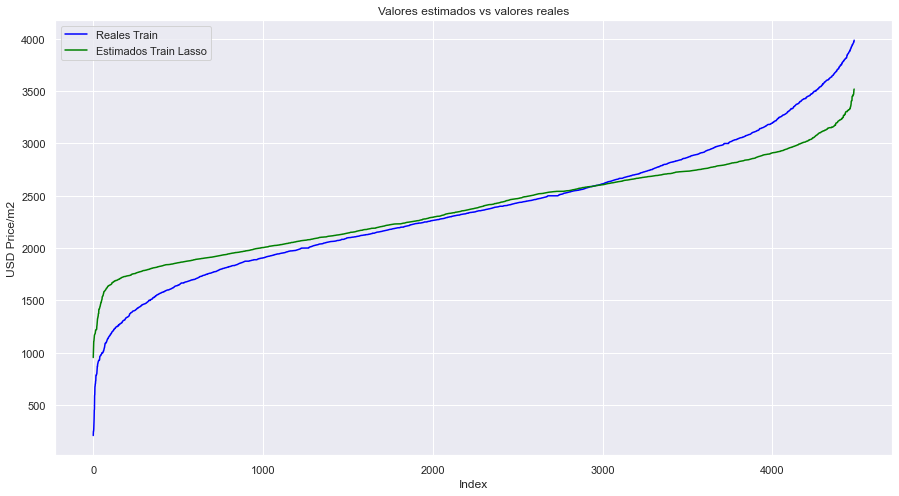

In [36]:
eje_X=range(1,len(y_train)+1)
plt.plot(eje_X, sorted(y_train), color='blue', label='Reales Train')
plt.plot(eje_X, sorted(lasso_prediction_train), color='green', label='Estimados Train Lasso')
plt.legend()
plt.title('Valores estimados vs valores reales')
plt.xlabel('Index')
plt.ylabel('USD Price/m2')
plt.show()

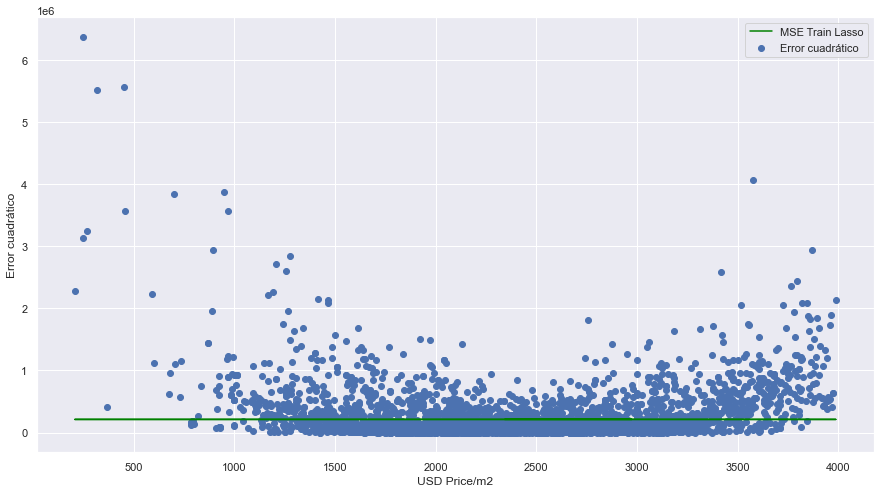

In [37]:
#Qué tan alejados están los valores del error cuadrático medio MSE TRAIN
err_cuad_train_lasso=pow(y_train - lasso_prediction_train,2)
plt.scatter(y_train,err_cuad_train_lasso, label='Error cuadrático')
plt.plot(y_train,np.repeat(mse_train_lasso,len(err_cuad_train_lasso)), label='MSE Train Lasso', color='green')
plt.legend()
plt.xlabel('USD Price/m2')
plt.ylabel('Error cuadrático')
plt.show()

Text(0.5, 1.0, 'Residuos del modelo con train')

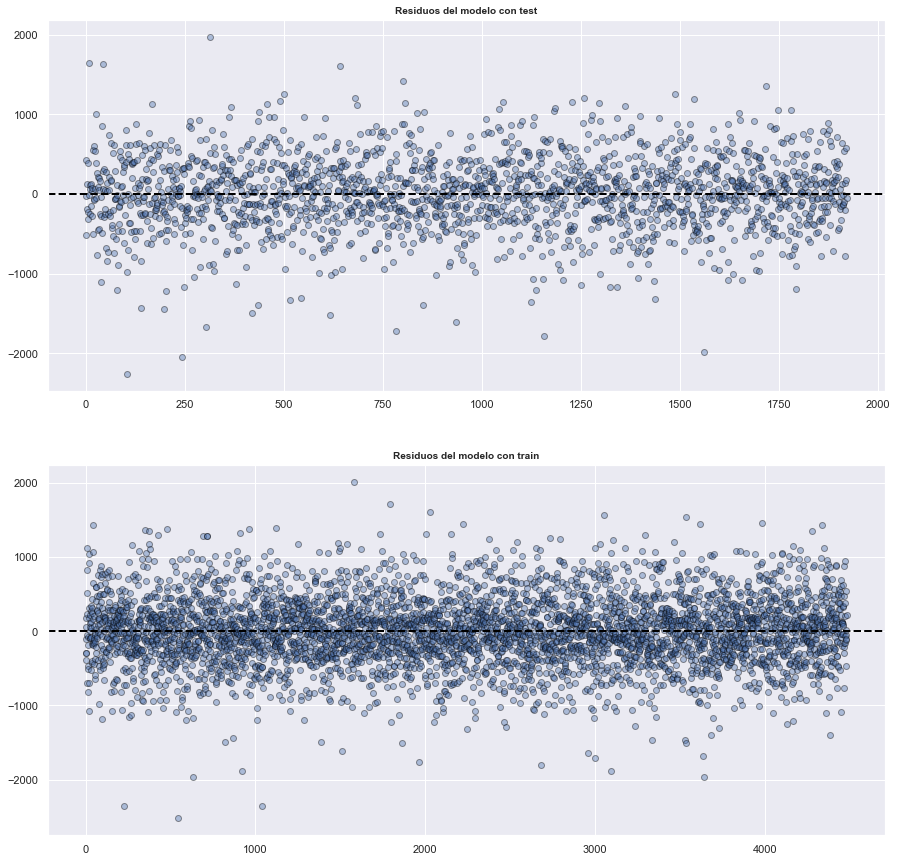

In [38]:
#Gráfico de los residuos/errores
model_residuals_test_lasso = y_test - lasso_prediction
model_residuals_train_lasso = y_train-lasso_prediction_train

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

axes[0].scatter(list(range(len(y_test))), model_residuals_test_lasso,
                   edgecolors=(0, 0, 0), alpha = 0.4, c="b")
axes[0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0].set_title('Residuos del modelo con test', fontsize = 10, fontweight = "bold")
axes[1].scatter(list(range(len(y_train))), model_residuals_train_lasso,
                   edgecolors=(0, 0, 0), alpha = 0.4, c="b")
axes[1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[1].set_title('Residuos del modelo con train', fontsize = 10, fontweight = "bold")

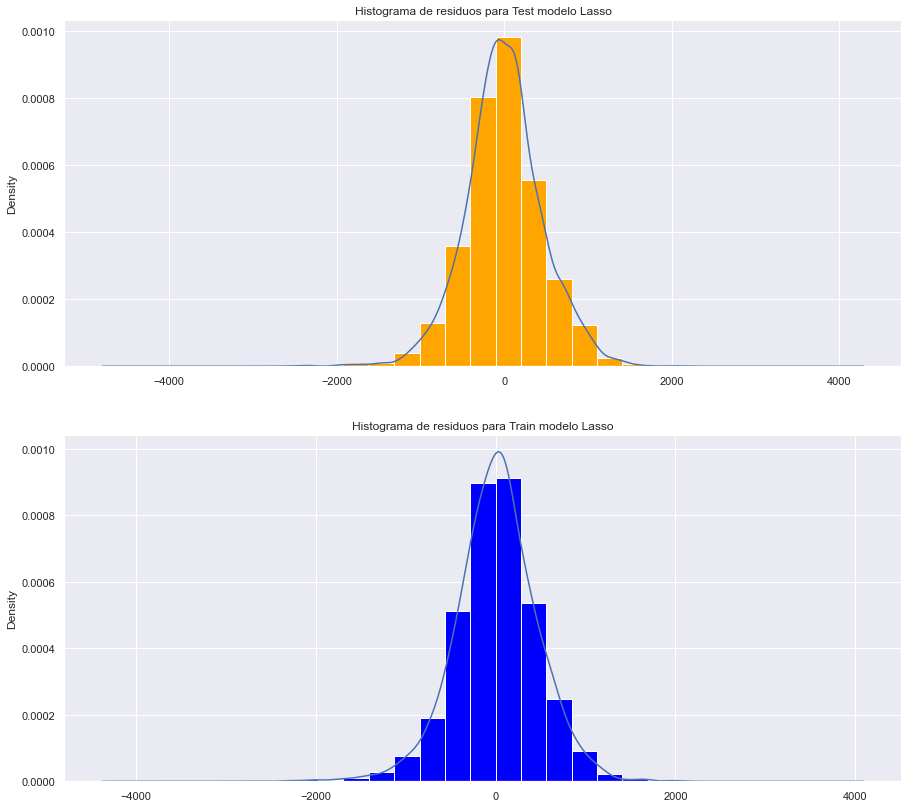

In [39]:
#Histograma de residuos
fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1, figsize=(15,14))

model_residuals_test_lasso.plot(kind = "hist", ax=ax2, density = True, bins = 15, color="blue");
model_residuals_test_lasso.plot(kind = "kde",ax=ax2);
model_residuals_train_lasso.plot(kind = "hist", ax=ax1, density = True, bins = 15, color="orange");
model_residuals_train_lasso.plot(kind = "kde",ax=ax1);
ax1.set_title("Histograma de residuos para Test modelo Lasso");
ax2.set_title("Histograma de residuos para Train modelo Lasso");

## Ridge

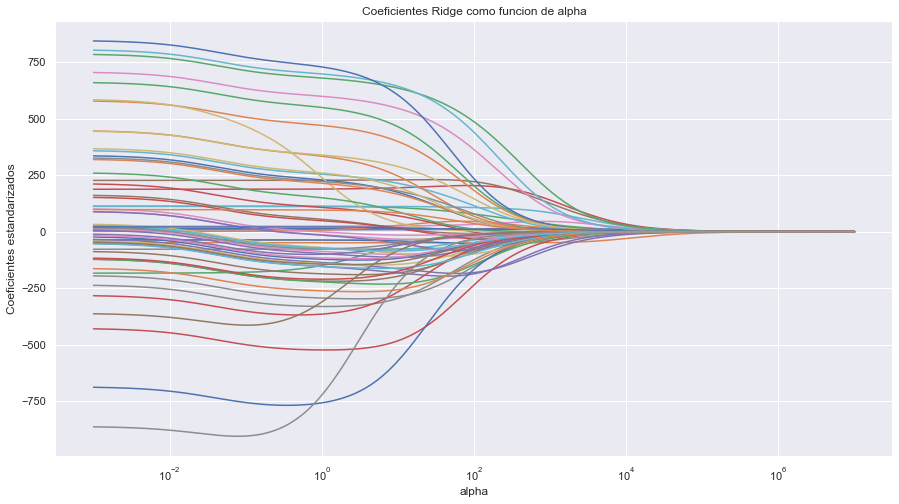

In [40]:
#Análisis previo de los alpha
#alphas_ridge = np.logspace(-10, 10, 400)
alphas_ridge = np.logspace(-3, 7,400)
ridge = linear_model.Ridge(max_iter=10000)
coefs = []

for a in alphas_ridge:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)

ax = plt.gca()

ax.plot(alphas_ridge, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coeficientes estandarizados')
plt.title('Coeficientes Ridge como funcion de alpha');

In [41]:
#Creamos el modelo
ridgecv = linear_model.RidgeCV(alphas=alphas_ridge,normalize=False,cv=10)
#Lo entrenamos
model_ridge = ridgecv.fit(X_train, y_train)
#Lo probamos
ridge_prediction = model_ridge.predict(X_test)
ridge_prediction_train = model_ridge.predict(X_train)

alpha_ridge = model_ridge.alpha_
coeff_ridge = model_ridge.coef_
intercept_ridge = model_ridge.intercept_
r2_test_ridge = model_ridge.score(X_test, y_test)
r2_train_ridge = model_ridge.score(X_train, y_train)
p = np.count_nonzero(coeff_ridge)
r2_adj_test_ridge = 1-((1-r2_test_ridge)*((len(y_test)-1)/(len(y_test)-p-1)))
r2_adj_train_ridge = 1-((1-r2_train_ridge)*((len(y_train)-1)/(len(y_train)-p-1)))
mse_test_ridge = mean_squared_error(y_test, ridge_prediction)
mse_train_ridge = mean_squared_error(y_train, ridge_prediction_train)
mae_test_ridge = mean_absolute_error(y_test, ridge_prediction)
mae_train_ridge = mean_absolute_error(y_train, ridge_prediction_train)
rmse_test_ridge = np.sqrt(mse_test_ridge)
rmse_train_ridge = np.sqrt(mse_train_ridge)

#Valores estadísticos MSE Test, MSE Train, MAE Test, MAE Train, RMSE Test, RMSE Train, R2 Test, R2 Train, R2 Adj Test, R2 Adj Train
stats_ridge = [mse_test_ridge, mse_train_ridge,
                mae_test_ridge, mae_train_ridge, 
                rmse_test_ridge,rmse_train_ridge,
                r2_test_ridge,r2_train_ridge,
                r2_adj_test_ridge,r2_adj_train_ridge
                ]

stats_dataframe_ridge =pd.DataFrame({name_model+' Ridge':stats_ridge},index=['MSE Test', 'MSE Train', 'MAE Test', 'MAE Train', 'RMSE Test', 'RMSE Train', 'R2 Test','R2 Train', 'R2 Adj Test','R2 Adj Train'])
stats_dataframe_ridge

Modelo 3 - Comparativa 3 Ridge
MSE Test                       209464.861054
MSE Train                      210996.968507
MAE Test                          347.295695
MAE Train                         350.066789
RMSE Test                         457.673313
RMSE Train                        459.344063
R2 Test                             0.430261
R2 Train                            0.465400
R2 Adj Test                         0.411249
R2 Adj Train                        0.457898

In [42]:
print("Alpha Ridge:",alpha_ridge)
print("Intercept Ridge:",intercept_ridge)
print("Coeficientes Ridge:")
print(pd.Series(coeff_ridge, index=X.columns))

Alpha Ridge: 1.0174634027476064
Intercept Ridge: 2083.724136935176
Coeficientes Ridge:
floor                      13.443262
rooms                     -48.563175
aEstrenar                 112.355762
garage                    188.889196
balcon                      8.165871
                             ...    
place_Villa Soldati      -720.832954
place_Villa Urquiza       339.507866
place_Villa del Parque    -73.621769
disposicion_frente         21.065922
disposicion_lateral        95.812182
Length: 62, dtype: float64


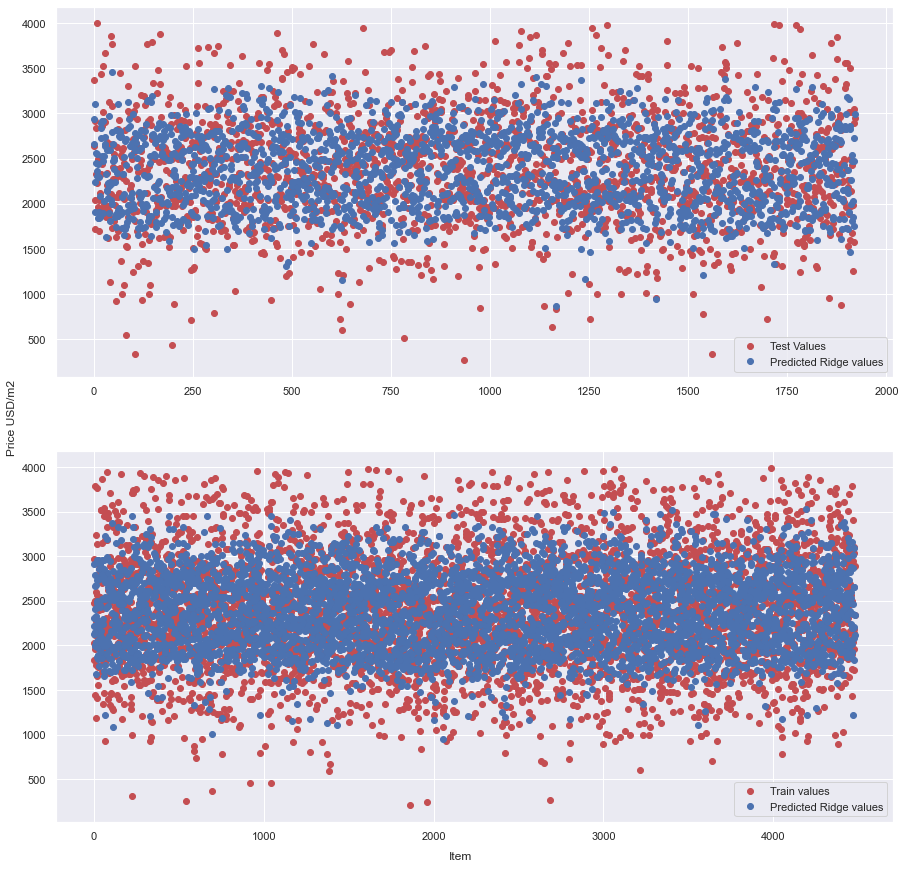

In [43]:
#Gráfico de los valores vs los predecidos
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

axes[0].plot([i for i in range(len(y_test))],y_test, 'ro', label="Test Values")
axes[0].plot([i for i in range(len(y_test))],ridge_prediction, 'bo', label="Predicted Ridge values")
axes[0].legend()

axes[1].plot([i for i in range(len(y_train))],y_train, 'ro', label="Train values")
axes[1].plot([i for i in range(len(y_train))],ridge_prediction_train, 'bo', label="Predicted Ridge values")
axes[1].legend()

fig.text(0.5, 0.09, 'Item', ha='center')
fig.text(0.08, 0.5, 'Price USD/m2', va='center', rotation='vertical')
plt.show()

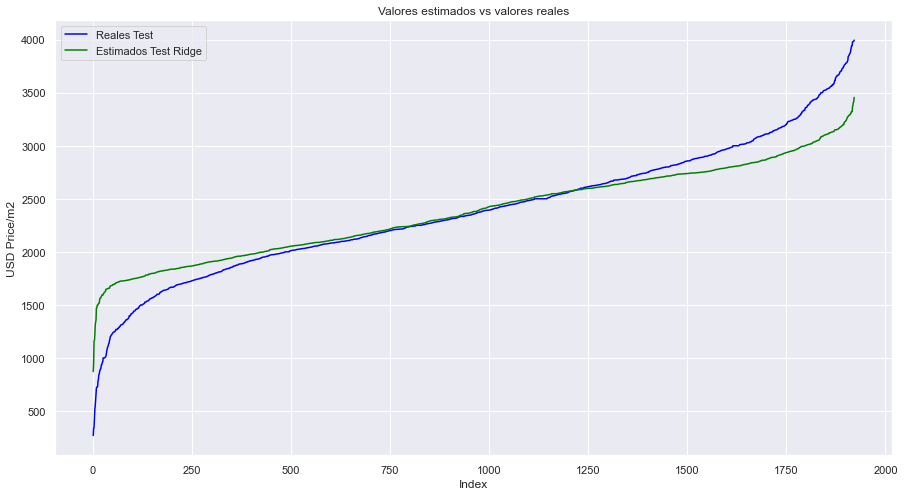

In [44]:
eje_X=range(1,len(y_test)+1)
plt.plot(eje_X, sorted(y_test), color='blue', label='Reales Test')
plt.plot(eje_X, sorted(ridge_prediction), color='green', label='Estimados Test Ridge')
plt.legend()
plt.title('Valores estimados vs valores reales')
plt.xlabel('Index')
plt.ylabel('USD Price/m2')
plt.show()

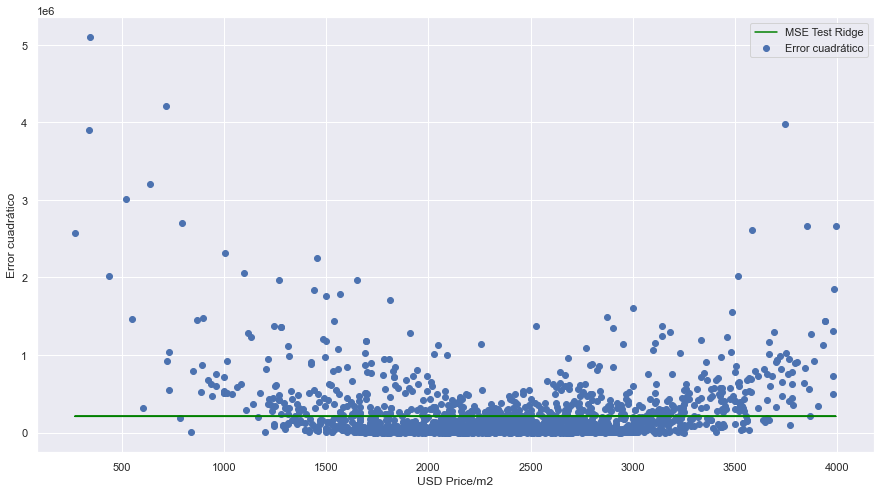

In [45]:
#Qué tan alejados están los valores del error cuadrático medio MSE TEST
err_cuad_test_ridge=pow(y_test - ridge_prediction,2)
plt.scatter(y_test,err_cuad_test_ridge, label='Error cuadrático')
plt.plot(y_test,np.repeat(mse_test_ridge,len(err_cuad_test_ridge)), label='MSE Test Ridge', color='green')
plt.legend()
plt.xlabel('USD Price/m2')
plt.ylabel('Error cuadrático')
plt.show()

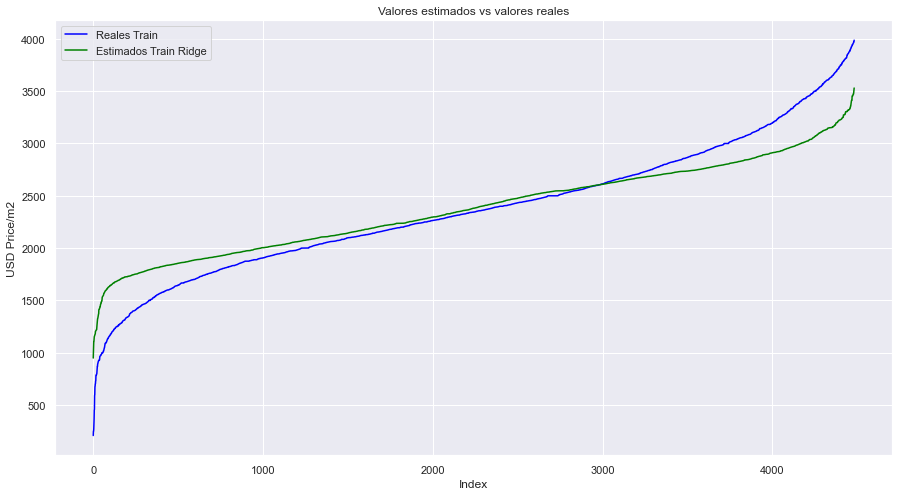

In [46]:
eje_X=range(1,len(y_train)+1)
plt.plot(eje_X, sorted(y_train), color='blue', label='Reales Train')
plt.plot(eje_X, sorted(ridge_prediction_train), color='green', label='Estimados Train Ridge')
plt.legend()
plt.title('Valores estimados vs valores reales')
plt.xlabel('Index')
plt.ylabel('USD Price/m2')
plt.show()

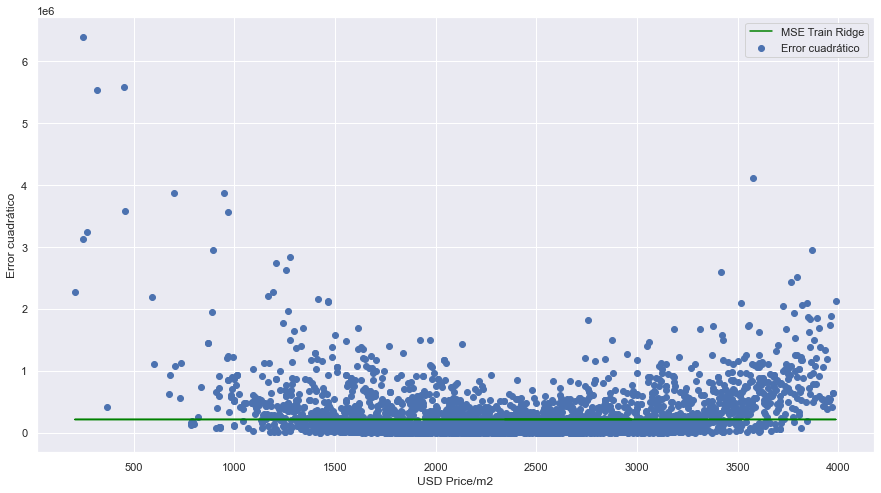

In [47]:
#Qué tan alejados están los valores del error cuadrático medio MSE TRAIN
err_cuad_train_ridge=pow(y_train - ridge_prediction_train,2)
plt.scatter(y_train,err_cuad_train_ridge, label='Error cuadrático')
plt.plot(y_train,np.repeat(mse_train_ridge,len(err_cuad_train_ridge)), label='MSE Train Ridge', color='green')
plt.legend()
plt.xlabel('USD Price/m2')
plt.ylabel('Error cuadrático')
plt.show()

Text(0.5, 1.0, 'Residuos del modelo con train')

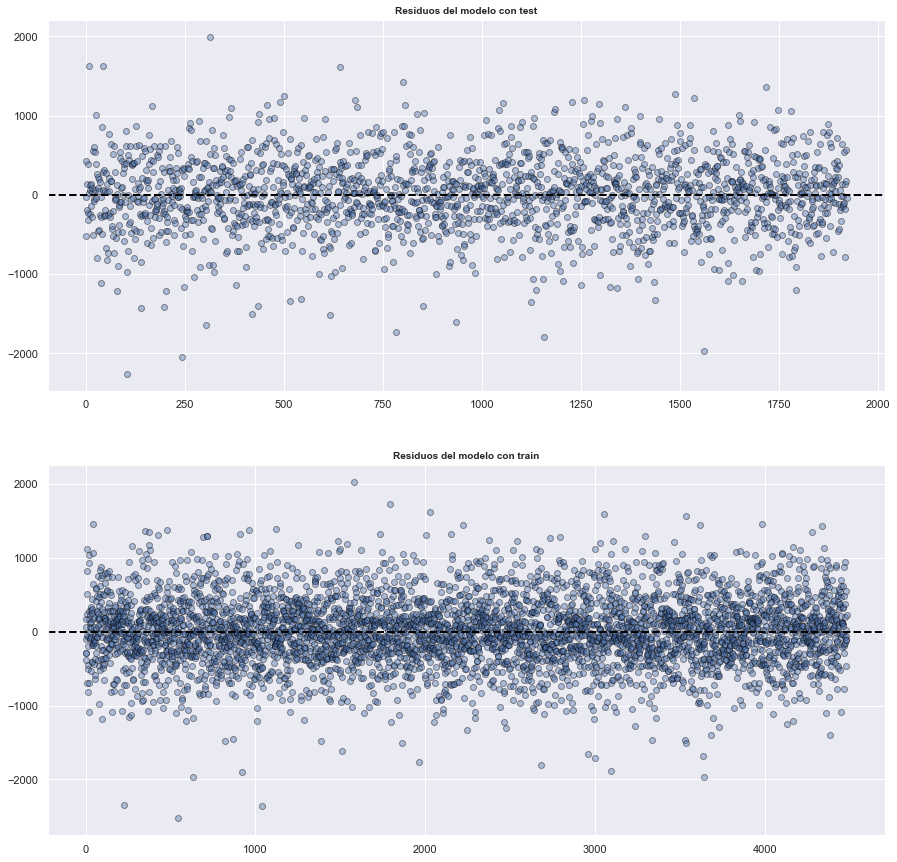

In [48]:
#Gráfico de los residuos/errores
model_residuals_test_ridge = y_test - ridge_prediction
model_residuals_train_ridge = y_train-ridge_prediction_train

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

axes[0].scatter(list(range(len(y_test))), model_residuals_test_ridge,
                   edgecolors=(0, 0, 0), alpha = 0.4, c="b")
axes[0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0].set_title('Residuos del modelo con test', fontsize = 10, fontweight = "bold")
axes[1].scatter(list(range(len(y_train))), model_residuals_train_ridge,
                   edgecolors=(0, 0, 0), alpha = 0.4, c="b")
axes[1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[1].set_title('Residuos del modelo con train', fontsize = 10, fontweight = "bold")

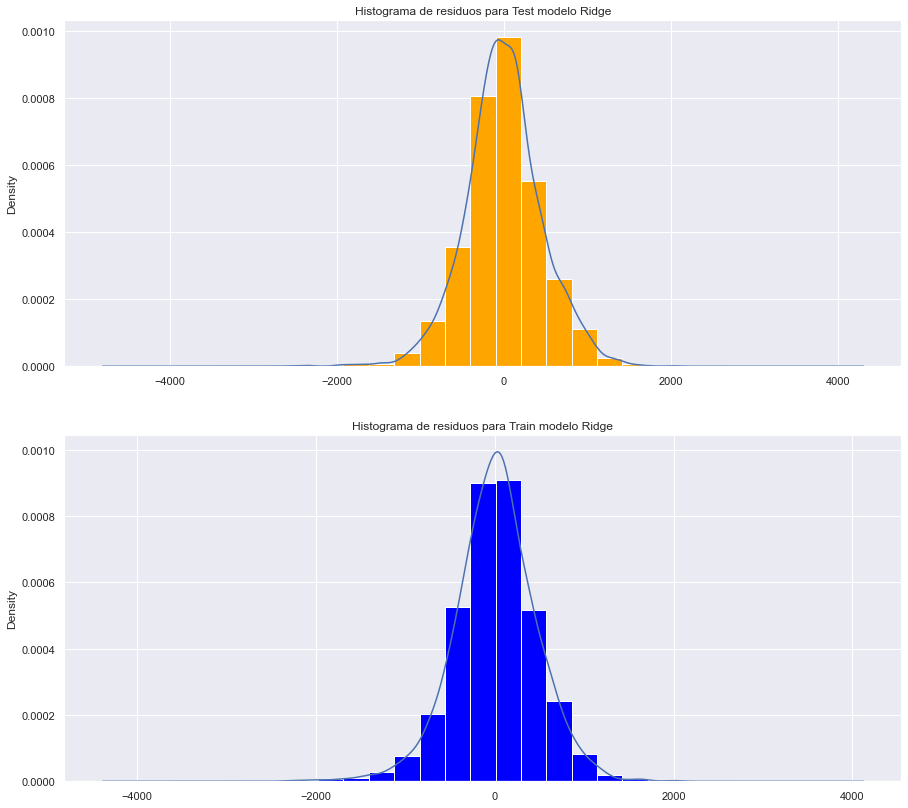

In [49]:
#Histograma de residuos
fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1, figsize=(15,14))

model_residuals_test_ridge.plot(kind = "hist", ax=ax2, density = True, bins = 15, color="blue");
model_residuals_test_ridge.plot(kind = "kde",ax=ax2);
model_residuals_train_ridge.plot(kind = "hist", ax=ax1, density = True, bins = 15, color="orange");
model_residuals_train_ridge.plot(kind = "kde",ax=ax1);
ax1.set_title("Histograma de residuos para Test modelo Ridge");
ax2.set_title("Histograma de residuos para Train modelo Ridge");

----
## Modelos comparados entre sí

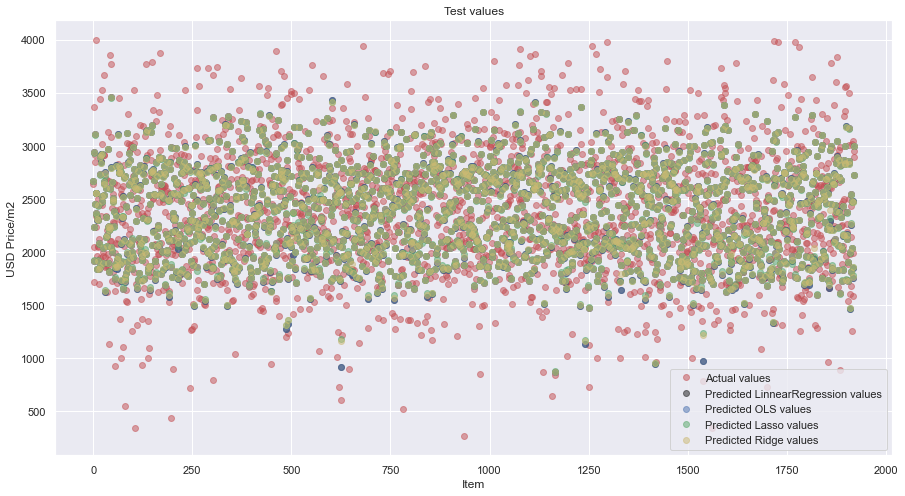

In [50]:
plt.figure(figsize=(15, 8))

plt.plot([i for i in range(len(y_test))],y_test, 'ro',label="Actual values",alpha=0.5)
plt.plot([i for i in range(len(y_test))],lr_prediction, 'ko',label="Predicted LinnearRegression values",alpha=0.5)
plt.plot([i for i in range(len(y_test))],sm_prediction, 'bo', label="Predicted OLS values",alpha=0.5)
plt.plot([i for i in range(len(y_test))],lasso_prediction, 'go', label="Predicted Lasso values",alpha=0.5)
plt.plot([i for i in range(len(y_test))],ridge_prediction, 'yo', label="Predicted Ridge values",alpha=0.5)

plt.legend()
plt.ylabel('USD Price/m2')
plt.xlabel('Item')
plt.title("Test values")
plt.show()

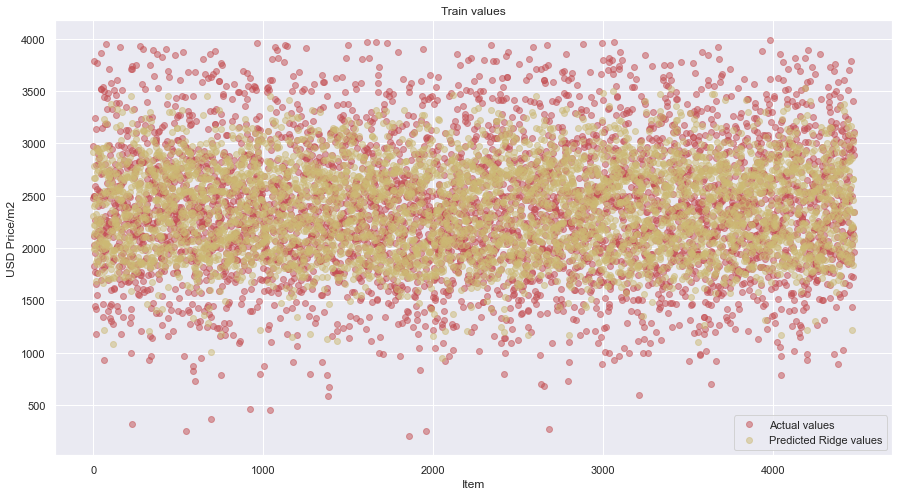

In [51]:
plt.figure(figsize=(15, 8))

plt.plot([i for i in range(len(y_train))],y_train, 'ro',label="Actual values",alpha=0.5)
#plt.plot([i for i in range(len(y_train))],lr_prediction_train, 'ko',label="Predicted LinnearRegression values",alpha=0.5)
#plt.plot([i for i in range(len(y_train))],sm_prediction_train, 'bo', label="Predicted OLS values",alpha=0.5)
#plt.plot([i for i in range(len(y_train))],lasso_prediction_train, 'go', label="Predicted Lasso values",alpha=0.5)
plt.plot([i for i in range(len(y_train))],ridge_prediction_train, 'yo', label="Predicted Ridge values",alpha=0.5)

plt.legend()
plt.ylabel('USD Price/m2')
plt.xlabel('Item')
plt.title("Train values")
plt.show()

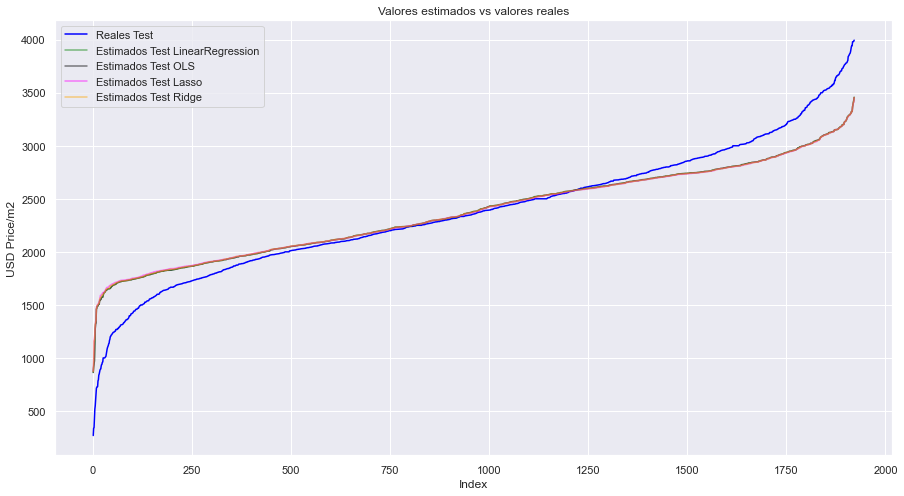

In [52]:
eje_X=range(1,len(y_test)+1)
plt.plot(eje_X, sorted(y_test), color='blue', label='Reales Test')
plt.plot(eje_X, sorted(lr_prediction), color='green', label='Estimados Test LinearRegression', alpha=0.5)
plt.plot(eje_X, sorted(sm_prediction), color='black', label='Estimados Test OLS', alpha=0.5)
plt.plot(eje_X, sorted(lasso_prediction), color='magenta', label='Estimados Test Lasso', alpha=0.5)
plt.plot(eje_X, sorted(ridge_prediction), color='orange', label='Estimados Test Ridge', alpha=0.5)
plt.legend()
plt.title('Valores estimados vs valores reales')
plt.xlabel('Index')
plt.ylabel('USD Price/m2')
plt.show()

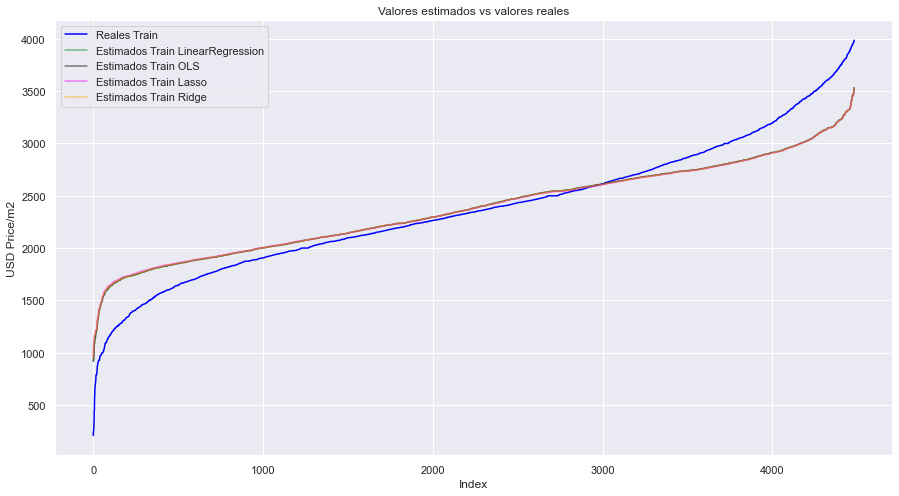

In [53]:
eje_X=range(1,len(y_train)+1)
plt.plot(eje_X, sorted(y_train), color='blue', label='Reales Train')
plt.plot(eje_X, sorted(lr_prediction_train), color='green', label='Estimados Train LinearRegression', alpha=0.5)
plt.plot(eje_X, sorted(sm_prediction_train), color='black', label='Estimados Train OLS', alpha=0.5)
plt.plot(eje_X, sorted(lasso_prediction_train), color='magenta', label='Estimados Train Lasso', alpha=0.5)
plt.plot(eje_X, sorted(ridge_prediction_train), color='orange', label='Estimados Train Ridge', alpha=0.5)
plt.legend()
plt.title('Valores estimados vs valores reales')
plt.xlabel('Index')
plt.ylabel('USD Price/m2')
plt.show()

In [54]:
# Valores estadísticos
pd.concat([stats_dataframe_lr,stats_dataframe_ols,stats_dataframe_lasso,stats_dataframe_ridge],axis=1)

Modelo 3 - Comparativa 3 LR  Modelo 3 - Comparativa 3 OLS  \
MSE Test                    209517.888966                 209517.888966   
MSE Train                   210907.567662                 210907.567662   
MAE Test                       347.222404                    347.222404   
MAE Train                      349.916306                    349.916306   
RMSE Test                      457.731241                    457.731241   
RMSE Train                     459.246739                    459.246739   
R2 Test                          0.430117                      0.430117   
R2 Train                         0.465626                      0.465626   
R2 Adj Test                      0.411100                      0.443860   
R2 Adj Train                     0.458127                      0.458127   

              Modelo 3 - Comparativa 3 Lasso  Modelo 3 - Comparativa 3 Ridge  
MSE Test                       209512.209619                   209464.861054  
MSE Train                      211244.286186                   210996.968507  
MAE Test                          347.377353                      347.295695  
MAE Train                         350.376955                      350.066789  
RMSE Test                         457.725037                      457.673313  
RMSE Train                        459.613192                      459.344063  
R2 Test                             0.430132                        0.430261  
R2 Train                            0.464773                        0.465400  
R2 Adj Test                         0.413955                        0.411249  
R2 Adj Train                        0.458365                        0.457898

In [55]:
# Parámetros
index_series = np.insert(X.columns.to_numpy(),0,'intercept')
series_lr = pd.Series(np.insert(coeff_lr,0,model_lr.intercept_),index=index_series, name="Linear Regression")
series_ols = pd.Series(model_ols.params.to_numpy(),index=index_series, name="OLS")
series_lasso = pd.Series(np.insert(coeff_lasso,0,model_lasso.intercept_),index=index_series, name="Lasso")
series_ridge = pd.Series(np.insert(coeff_ridge,0,model_ridge.intercept_),index=index_series, name="Ridge")

pd.set_option('display.max_rows', 500)
pd.concat([series_lr,series_ols,series_lasso,series_ridge],axis=1)

Linear Regression          OLS        Lasso  \
intercept                        1983.835617  1983.835617  2011.372079   
floor                              13.455637    13.455637    13.291897   
rooms                             -48.449818   -48.449818   -48.524731   
aEstrenar                         112.988330   112.988330   109.686316   
garage                            188.070994   188.070994   189.689382   
balcon                              8.202319     8.202319     7.494443   
piscina                           227.219877   227.219877   228.710326   
sum                                23.889731    23.889731    23.466926   
patio                             -77.620724   -77.620724   -76.552964   
lavadero                          -37.326180   -37.326180   -36.946228   
amenities                         112.034140   112.034140   111.808617   
parrilla                          -36.096878   -36.096878   -34.607933   
ptype_apartment                     1.261469     1.261469     6.636420   
ptype_house                      -183.555515  -183.555515   -26.987380   
place_Almagro                     213.721421   213.721421   178.883925   
place_Balvanera                   -31.717120   -31.717120   -58.951551   
place_Barracas                    -85.729337   -85.729337   -97.602085   
place_Belgrano                    707.573491   707.573491   673.572288   
place_Boca                       -192.983394  -192.983394  -211.341346   
place_Boedo                       -39.335741   -39.335741   -51.454613   
place_Caballito                   360.837011   360.837011   327.502592   
place_Chacarita                   338.342243   338.342243   297.036804   
place_Coghlan                     448.322522   448.322522   396.821888   
place_Colegiales                  662.580603   662.580603   621.634041   
place_Constitución               -427.800384  -427.800384  -444.577283   
place_Flores                      -49.486045   -49.486045   -77.010132   
place_Floresta                   -120.394753  -120.394753  -124.865907   
place_Liniers                      15.645724    15.645724    -0.000000   
place_Mataderos                  -235.116449  -235.116449  -245.219711   
place_Monserrat                    35.005518    35.005518     0.000000   
place_Monte Castro                 28.226187    28.226187    -0.000000   
place_Nueva Pompeya               -21.025996   -21.025996   -23.719210   
place_Nuñez                       581.030625   581.030625   542.191413   
place_Palermo                     787.355096   787.355096   755.048776   
place_Parque Avellaneda          -281.139359  -281.139359  -266.804479   
place_Parque Chacabuco              8.085844     8.085844   -13.650279   
place_Parque Chas                 163.297509   163.297509    93.198617   
place_Parque Patricios             91.334722    91.334722    25.203055   
place_Paternal                     20.849229    20.849229    -0.000000   
place_Puerto Madero               587.416892   587.416892     0.000000   
place_Recoleta                    806.414735   806.414735   773.341378   
place_Retiro                      847.469349   847.469349   803.212682   
place_Saavedra                    322.062135   322.062135   283.887613   
place_San Cristóbal              -119.379334  -119.379334  -143.299171   
place_San Nicolás                 154.329767   154.329767   118.693582   
place_San Telmo                    90.727407    90.727407    53.320739   
place_Velez Sarsfield             -44.021662   -44.021662   -44.048212   
place_Versalles                   103.033875   103.033875     0.000000   
place_Villa Crespo                328.657546   328.657546   294.466137   
place_Villa Devoto                369.872416   369.872416   325.756101   
place_Villa General Mitre         -51.338552   -51.338552   -68.048300   
place_Villa Lugano               -686.618501  -686.618501  -681.983655   
place_Villa Luro                 -161.233336  -161.233336  -178.483923   
place_Villa Ortuzar            